In [1]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn import preprocessing

In [200]:
df = pd.read_csv("../data/clean_data.csv")

/home/rebecca/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [201]:
df

,Unnamed: 0,DATE,start_station_id,start_lat,start_lon,hour_of_day,COUNT,AVG_WND_SPEED,PRCP,SNOW,SNOW_DEPTH,TAVG,TMAX,TMIN,FOG,THUNDER,SLEET_OR_HAIL,month,year,count_range
0,0,2015-04-23,3004.0,39.953780,-75.163740,10,5,15.21,0.0,0.0,0.0,48.0,52,43,0.0,0.0,0.0,4,2015,6
1,1,2015-04-23,3004.0,39.953780,-75.163740,12,3,15.21,0.0,0.0,0.0,48.0,52,43,0.0,0.0,0.0,4,2015,4
2,2,2015-04-23,3004.0,39.953780,-75.163740,13,2,15.21,0.0,0.0,0.0,48.0,52,43,0.0,0.0,0.0,4,2015,2
3,3,2015-04-23,3004.0,39.953780,-75.163740,14,1,15.21,0.0,0.0,0.0,48.0,52,43,0.0,0.0,0.0,4,2015,2
4,4,2015-04-23,3004.0,39.953780,-75.163740,15,5,15.21,0.0,0.0,0.0,48.0,52,43,0.0,0.0,0.0,4,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443987,1444012,2019-09-30,3210.0,39.984921,-75.156677,9,3,7.61,0.0,0.0,0.0,69.0,75,62,0.0,0.0,0.0,9,2019,4
1443988,1444013,2019-09-30,3210.0,39.984921,-75.156677,10,1,7.61,0.0,0.0,0.0,69.0,75,62,0.0,0.0,0.0,9,2019,2
1443989,1444014,2019-09-30,3210.0,39.984921,-75.156677,11,1,7.61,0.0,0.0,0.0,69.0,75,62,0.0,0.0,0.0,9,2019,2
1443990,1444015,2019-09-30,3210.0,39.984921,-75.156677,12,1,7.61,0.0,0.0,0.0,69.0,75,62,0.0,0.0,0.0,9,2019,2


In [202]:
df['DATE'] =  pd.to_datetime(df['DATE'])


In [203]:
df = df.drop(['Unnamed: 0', 'year'], axis=1)

In [204]:
df

,DATE,start_station_id,start_lat,start_lon,hour_of_day,COUNT,AVG_WND_SPEED,PRCP,SNOW,SNOW_DEPTH,TAVG,TMAX,TMIN,FOG,THUNDER,SLEET_OR_HAIL,month,count_range
0,2015-04-23,3004.0,39.953780,-75.163740,10,5,15.21,0.0,0.0,0.0,48.0,52,43,0.0,0.0,0.0,4,6
1,2015-04-23,3004.0,39.953780,-75.163740,12,3,15.21,0.0,0.0,0.0,48.0,52,43,0.0,0.0,0.0,4,4
2,2015-04-23,3004.0,39.953780,-75.163740,13,2,15.21,0.0,0.0,0.0,48.0,52,43,0.0,0.0,0.0,4,2
3,2015-04-23,3004.0,39.953780,-75.163740,14,1,15.21,0.0,0.0,0.0,48.0,52,43,0.0,0.0,0.0,4,2
4,2015-04-23,3004.0,39.953780,-75.163740,15,5,15.21,0.0,0.0,0.0,48.0,52,43,0.0,0.0,0.0,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443987,2019-09-30,3210.0,39.984921,-75.156677,9,3,7.61,0.0,0.0,0.0,69.0,75,62,0.0,0.0,0.0,9,4
1443988,2019-09-30,3210.0,39.984921,-75.156677,10,1,7.61,0.0,0.0,0.0,69.0,75,62,0.0,0.0,0.0,9,2
1443989,2019-09-30,3210.0,39.984921,-75.156677,11,1,7.61,0.0,0.0,0.0,69.0,75,62,0.0,0.0,0.0,9,2
1443990,2019-09-30,3210.0,39.984921,-75.156677,12,1,7.61,0.0,0.0,0.0,69.0,75,62,0.0,0.0,0.0,9,2


In [205]:
df['WEEKDAY'] = pd.to_datetime(df['DATE']).dt.dayofweek 
df["WEEKDAY"] = (df["WEEKDAY"] < 5).astype(int)

In [206]:
dr = pd.date_range(start='2015-01-01', end='2019-10-31')

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

df['HOLIDAY'] = df['DATE'].isin(holidays)
df

,DATE,start_station_id,start_lat,start_lon,hour_of_day,COUNT,AVG_WND_SPEED,PRCP,SNOW,SNOW_DEPTH,TAVG,TMAX,TMIN,FOG,THUNDER,SLEET_OR_HAIL,month,count_range,WEEKDAY,HOLIDAY
0,2015-04-23,3004.0,39.953780,-75.163740,10,5,15.21,0.0,0.0,0.0,48.0,52,43,0.0,0.0,0.0,4,6,1,False
1,2015-04-23,3004.0,39.953780,-75.163740,12,3,15.21,0.0,0.0,0.0,48.0,52,43,0.0,0.0,0.0,4,4,1,False
2,2015-04-23,3004.0,39.953780,-75.163740,13,2,15.21,0.0,0.0,0.0,48.0,52,43,0.0,0.0,0.0,4,2,1,False
3,2015-04-23,3004.0,39.953780,-75.163740,14,1,15.21,0.0,0.0,0.0,48.0,52,43,0.0,0.0,0.0,4,2,1,False
4,2015-04-23,3004.0,39.953780,-75.163740,15,5,15.21,0.0,0.0,0.0,48.0,52,43,0.0,0.0,0.0,4,6,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443987,2019-09-30,3210.0,39.984921,-75.156677,9,3,7.61,0.0,0.0,0.0,69.0,75,62,0.0,0.0,0.0,9,4,1,False
1443988,2019-09-30,3210.0,39.984921,-75.156677,10,1,7.61,0.0,0.0,0.0,69.0,75,62,0.0,0.0,0.0,9,2,1,False
1443989,2019-09-30,3210.0,39.984921,-75.156677,11,1,7.61,0.0,0.0,0.0,69.0,75,62,0.0,0.0,0.0,9,2,1,False
1443990,2019-09-30,3210.0,39.984921,-75.156677,12,1,7.61,0.0,0.0,0.0,69.0,75,62,0.0,0.0,0.0,9,2,1,False


In [207]:
holidays

DatetimeIndex(['2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25',
               '2015-07-03', '2015-09-07', '2015-10-12', '2015-11-11',
               '2015-11-26', '2015-12-25', '2016-01-01', '2016-01-18',
               '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-26',
               '2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29',
               '2017-07-04', '2017-09-04', '2017-10-09', '2017-11-10',
               '2017-11-23', '2017-12-25', '2018-01-01', '2018-01-15',
               '2018-02-19', '2018-05-28', '2018-07-04', '2018-09-03',
               '2018-10-08', '2018-11-12', '2018-11-22', '2018-12-25',
               '2019-01-01', '2019-01-21', '2019-02-18', '2019-05-27',
               '2019-07-04', '2019-09-02', '2019-10-14'],
              dtype='datetime64[ns]', freq=None)

In [208]:
df[(df['DATE'] > '2018-07-01') & (df['DATE'] < '2018-07-05')]

,DATE,start_station_id,start_lat,start_lon,hour_of_day,COUNT,AVG_WND_SPEED,PRCP,SNOW,SNOW_DEPTH,TAVG,TMAX,TMIN,FOG,THUNDER,SLEET_OR_HAIL,month,count_range,WEEKDAY,HOLIDAY
976418,2018-07-02,3004.0,39.953781,-75.163742,7,1,5.37,0.0,0.0,0.0,86.0,97,73,1.0,0.0,0.0,7,2,1,False
976419,2018-07-02,3004.0,39.953781,-75.163742,11,1,5.37,0.0,0.0,0.0,86.0,97,73,1.0,0.0,0.0,7,2,1,False
976420,2018-07-02,3004.0,39.953781,-75.163742,12,2,5.37,0.0,0.0,0.0,86.0,97,73,1.0,0.0,0.0,7,2,1,False
976421,2018-07-02,3004.0,39.953781,-75.163742,13,2,5.37,0.0,0.0,0.0,86.0,97,73,1.0,0.0,0.0,7,2,1,False
976422,2018-07-02,3004.0,39.953781,-75.163742,14,1,5.37,0.0,0.0,0.0,86.0,97,73,1.0,0.0,0.0,7,2,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979534,2018-07-04,3170.0,39.944260,-75.181343,22,1,4.70,0.0,0.0,0.0,81.0,94,74,1.0,1.0,0.0,7,2,1,True
979535,2018-07-04,3181.0,39.896290,-75.175140,15,2,4.70,0.0,0.0,0.0,81.0,94,74,1.0,1.0,0.0,7,2,1,True
979536,2018-07-04,3188.0,39.904709,-75.173401,19,2,4.70,0.0,0.0,0.0,81.0,94,74,1.0,1.0,0.0,7,2,1,True
979537,2018-07-04,3188.0,39.904709,-75.173401,20,4,4.70,0.0,0.0,0.0,81.0,94,74,1.0,1.0,0.0,7,4,1,True


In [11]:
from sklearn.model_selection import train_test_split
X = df[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED', 'PRCP', 'SNOW', 'SNOW_DEPTH', 'TAVG', 'TMAX', 'TMIN', 'FOG', 'THUNDER', 'SLEET_OR_HAIL', 'month', 'WEEKDAY', 'HOLIDAY']]
normalized_X = preprocessing.normalize(X)
y = df['count_range'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.2)

In [12]:
normalized_X

array([[ 0.33235741, -0.62525314,  0.08318547, ...,  0.03327419,
         0.00831855,  0.        ],
       [ 0.3318526 , -0.62430344,  0.09967095, ...,  0.03322365,
         0.00830591,  0.        ],
       [ 0.33156679, -0.62376577,  0.10788387, ...,  0.03319504,
         0.00829876,  0.        ],
       ...,
       [ 0.27119653, -0.50974792,  0.07460717, ...,  0.06104223,
         0.00678247,  0.        ],
       [ 0.27105318, -0.50947846,  0.08134662, ...,  0.06100996,
         0.00677888,  0.        ],
       [ 0.27015462, -0.50778951,  0.11485901, ...,  0.06080771,
         0.00675641,  0.        ]])

In [13]:


#X_train['start_lat'] = pd.to_numeric(X_train['start_lat'], errors='coerce')
#X_train['start_lon'] = pd.to_numeric(X_train['start_lon'], errors='coerce')
#X_test['start_lat'] = pd.to_numeric(X_test['start_lat'], errors='coerce')
#X_test['start_lon'] = pd.to_numeric(X_test['start_lon'], errors='coerce')

encoded_y = preprocessing.LabelEncoder().fit_transform(y_train)
ohe = preprocessing.OneHotEncoder(sparse=False)
encoded_x = ohe.fit_transform(X_train)

encoded_test_y = preprocessing.LabelEncoder().fit_transform(y_test)
ohe = preprocessing.OneHotEncoder(sparse=False)
encoded_test_x = ohe.fit_transform(X_test)

/home/rebecca/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/rebecca/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto

In [14]:
df.count_range.describe()

count     1443992
unique         13
top             2
freq       627496
Name: count_range, dtype: object

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=125, max_depth=5, random_state=0)
clf.fit(encoded_x, encoded_y)  
clf.score(encoded_test_x, encoded_test_y)

0.7388010346296213

In [63]:
df_station = pd.read_csv("../data/raw_data/indego_stations_bike_score.csv")


In [64]:
df_station = df_station.drop(index=0)

In [209]:
df_station

,Station_ID,Station_Name,Day of Go_live_date,Status,Neighborhood,Walk Score,Transit Score,Bike Score,Population
1,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0
2,3005,"Welcome Park, NPS",4/23/2015,Active,Center City East,98.0,97.0,84.0,14635.0
3,3006,40th & Spruce,4/23/2015,Active,University City,95.0,91.0,97.0,14345.0
4,3007,"11th & Pine, Kahn Park",4/23/2015,Active,Washington Square West,98.0,100.0,98.0,11444.0
5,3008,Temple University Station,4/23/2015,Active,North Philadelphia East,81.0,89.0,67.0,43367.0
...,...,...,...,...,...,...,...,...,...
142,3201,16th & Arch,9/10/2019,Active,Logan Square,99.0,100.0,76.0,5137.0
143,3202,16th & Chestnut,8/30/2019,Active,Center City West,100.0,100.0,83.0,6411.0
144,3206,18th & Chestnut,8/29/2019,Active,Center City West,100.0,100.0,89.0,6411.0
145,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0


In [210]:
df = df.merge(df_station, left_on='start_station_id', right_on='Station_ID')

In [211]:
df

,DATE,start_station_id,start_lat,start_lon,hour_of_day,COUNT,AVG_WND_SPEED,PRCP,SNOW,SNOW_DEPTH,...,HOLIDAY,Station_ID,Station_Name,Day of Go_live_date,Status,Neighborhood,Walk Score,Transit Score,Bike Score,Population
0,2015-04-23,3004.0,39.953780,-75.163740,10,5,15.21,0.0,0.0,0.0,...,False,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0
1,2015-04-23,3004.0,39.953780,-75.163740,12,3,15.21,0.0,0.0,0.0,...,False,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0
2,2015-04-23,3004.0,39.953780,-75.163740,13,2,15.21,0.0,0.0,0.0,...,False,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0
3,2015-04-23,3004.0,39.953780,-75.163740,14,1,15.21,0.0,0.0,0.0,...,False,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0
4,2015-04-23,3004.0,39.953780,-75.163740,15,5,15.21,0.0,0.0,0.0,...,False,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443952,2019-09-30,3209.0,39.949001,-75.212784,11,1,7.61,0.0,0.0,0.0,...,False,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0
1443953,2019-09-30,3209.0,39.949001,-75.212784,12,1,7.61,0.0,0.0,0.0,...,False,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0
1443954,2019-09-30,3209.0,39.949001,-75.212784,13,1,7.61,0.0,0.0,0.0,...,False,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0
1443955,2019-09-30,3209.0,39.949001,-75.212784,14,1,7.61,0.0,0.0,0.0,...,False,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0


In [31]:
df = df.drop(['Station_ID', 'Station_Name', 'Day of Go_live_date', 'Status', 'Neighborhood'], axis=1)

In [212]:
df.columns.values

array(['DATE', 'start_station_id', 'start_lat', 'start_lon',
       'hour_of_day', 'COUNT', 'AVG_WND_SPEED', 'PRCP', 'SNOW',
       'SNOW_DEPTH', 'TAVG', 'TMAX', 'TMIN', 'FOG', 'THUNDER',
       'SLEET_OR_HAIL', 'month', 'count_range', 'WEEKDAY', 'HOLIDAY',
       'Station_ID', 'Station_Name', 'Day of Go_live_date', 'Status',
       'Neighborhood', 'Walk Score', 'Transit Score', 'Bike Score',
       'Population'], dtype=object)

In [73]:
X = df[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED', 'PRCP', 'SNOW', 'SNOW_DEPTH', 'TAVG', 'TMAX', 'TMIN', 'FOG', 'THUNDER', 'SLEET_OR_HAIL', 'month', 'WEEKDAY', 'HOLIDAY', 'Walk Score', 'Transit Score', 'Bike Score']]
normalized_X = preprocessing.normalize(X)
y = df['count_range'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.3)

X = df[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED', 'PRCP', 'SNOW', 'SNOW_DEPTH', 'TAVG', 'TMAX', 'TMIN', 'FOG', 'THUNDER', 'SLEET_OR_HAIL', 'month', 'WEEKDAY', 'HOLIDAY', 'Walk Score', 'Transit Score', 'Bike Score', 'Neighborhood']]
#normalized_X = preprocessing.normalize(X)
y = df['count_range'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [74]:
encoded_y = preprocessing.LabelEncoder().fit_transform(y_train)
ohe = preprocessing.OneHotEncoder(sparse=False)
encoded_x = ohe.fit_transform(X_train)

encoded_test_y = preprocessing.LabelEncoder().fit_transform(y_test)
ohe = preprocessing.OneHotEncoder(sparse=False)
encoded_test_x = ohe.fit_transform(X_test)

/home/rebecca/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/rebecca/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=125, max_depth=5, random_state=0)
clf.fit(encoded_x, encoded_y)  
clf.score(encoded_test_x, encoded_test_y)

0.7376912564521639

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = RandomForestClassifier(n_estimators=125, max_depth=5, random_state=0)
clf.fit(X_train, y_train)  
clf.score(X_test, y_test)

0.7381194769938225

# adding no demand times
only add times/station combos that arent in dataset

keep distribution of stations the same

only add stations past their go live date



In [213]:
df

,DATE,start_station_id,start_lat,start_lon,hour_of_day,COUNT,AVG_WND_SPEED,PRCP,SNOW,SNOW_DEPTH,...,HOLIDAY,Station_ID,Station_Name,Day of Go_live_date,Status,Neighborhood,Walk Score,Transit Score,Bike Score,Population
0,2015-04-23,3004.0,39.953780,-75.163740,10,5,15.21,0.0,0.0,0.0,...,False,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0
1,2015-04-23,3004.0,39.953780,-75.163740,12,3,15.21,0.0,0.0,0.0,...,False,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0
2,2015-04-23,3004.0,39.953780,-75.163740,13,2,15.21,0.0,0.0,0.0,...,False,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0
3,2015-04-23,3004.0,39.953780,-75.163740,14,1,15.21,0.0,0.0,0.0,...,False,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0
4,2015-04-23,3004.0,39.953780,-75.163740,15,5,15.21,0.0,0.0,0.0,...,False,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443952,2019-09-30,3209.0,39.949001,-75.212784,11,1,7.61,0.0,0.0,0.0,...,False,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0
1443953,2019-09-30,3209.0,39.949001,-75.212784,12,1,7.61,0.0,0.0,0.0,...,False,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0
1443954,2019-09-30,3209.0,39.949001,-75.212784,13,1,7.61,0.0,0.0,0.0,...,False,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0
1443955,2019-09-30,3209.0,39.949001,-75.212784,14,1,7.61,0.0,0.0,0.0,...,False,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f207de5ac50>]],
      dtype=object)

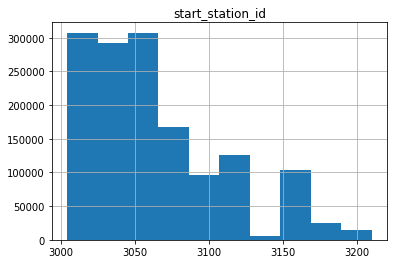

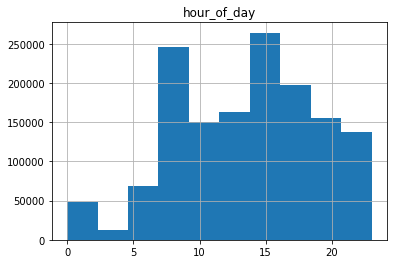

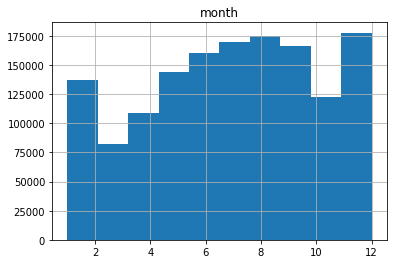

In [85]:
%matplotlib inline
df.hist(column="start_station_id")
df.hist(column="hour_of_day")
df.hist(column="month")

In [219]:
df.set_index('DATE', inplace=True)

In [220]:
df

,start_station_id,start_lat,start_lon,hour_of_day,COUNT,AVG_WND_SPEED,PRCP,SNOW,SNOW_DEPTH,TAVG,...,Station_ID,Station_Name,Day of Go_live_date,Status,Neighborhood,Walk Score,Transit Score,Bike Score,Population,Datetime
DATE,,,,,,,,,,,,,,,,,,,,,
2015-04-23,3004.0,39.953780,-75.163740,10:00:00,5,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,1970-01-01 10:00:00.000000000
2015-04-23,3004.0,39.953780,-75.163740,12:00:00,3,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,1970-01-01 12:00:00.000000001
2015-04-23,3004.0,39.953780,-75.163740,13:00:00,2,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,1970-01-01 13:00:00.000000002
2015-04-23,3004.0,39.953780,-75.163740,14:00:00,1,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,1970-01-01 14:00:00.000000003
2015-04-23,3004.0,39.953780,-75.163740,15:00:00,5,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,1970-01-01 15:00:00.000000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,3209.0,39.949001,-75.212784,11:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,1970-01-01 11:00:00.001443952
2019-09-30,3209.0,39.949001,-75.212784,12:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,1970-01-01 12:00:00.001443953
2019-09-30,3209.0,39.949001,-75.212784,13:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,1970-01-01 13:00:00.001443954


In [221]:
pd.date_range(start = '2015-04-23', end = '2019-09-30' ).difference(df.index)

DatetimeIndex(['2016-01-23', '2016-01-24'], dtype='datetime64[ns]', freq=None)

In [222]:
df.hour_of_day = pd.to_datetime(df.hour_of_day,format='%H')


ValueError: unconverted data remains: :00:00

In [223]:
df.hour_of_day = pd.to_datetime(df.hour_of_day).dt.strftime('%H:%M:%S')

In [224]:
df

,start_station_id,start_lat,start_lon,hour_of_day,COUNT,AVG_WND_SPEED,PRCP,SNOW,SNOW_DEPTH,TAVG,...,Station_ID,Station_Name,Day of Go_live_date,Status,Neighborhood,Walk Score,Transit Score,Bike Score,Population,Datetime
DATE,,,,,,,,,,,,,,,,,,,,,
2015-04-23,3004.0,39.953780,-75.163740,10:00:00,5,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,1970-01-01 10:00:00.000000000
2015-04-23,3004.0,39.953780,-75.163740,12:00:00,3,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,1970-01-01 12:00:00.000000001
2015-04-23,3004.0,39.953780,-75.163740,13:00:00,2,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,1970-01-01 13:00:00.000000002
2015-04-23,3004.0,39.953780,-75.163740,14:00:00,1,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,1970-01-01 14:00:00.000000003
2015-04-23,3004.0,39.953780,-75.163740,15:00:00,5,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,1970-01-01 15:00:00.000000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,3209.0,39.949001,-75.212784,11:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,1970-01-01 11:00:00.001443952
2019-09-30,3209.0,39.949001,-75.212784,12:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,1970-01-01 12:00:00.001443953
2019-09-30,3209.0,39.949001,-75.212784,13:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,1970-01-01 13:00:00.001443954


In [233]:
df['Datetime'] = pd.to_datetime(df.index) + pd.to_timedelta(df.hour_of_day, unit='h')

In [234]:
df

,start_station_id,start_lat,start_lon,hour_of_day,COUNT,AVG_WND_SPEED,PRCP,SNOW,SNOW_DEPTH,TAVG,...,Station_ID,Station_Name,Day of Go_live_date,Status,Neighborhood,Walk Score,Transit Score,Bike Score,Population,Datetime
DATE,,,,,,,,,,,,,,,,,,,,,
2015-04-23,3004.0,39.953780,-75.163740,10:00:00,5,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 10:00:00
2015-04-23,3004.0,39.953780,-75.163740,12:00:00,3,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 12:00:00
2015-04-23,3004.0,39.953780,-75.163740,13:00:00,2,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 13:00:00
2015-04-23,3004.0,39.953780,-75.163740,14:00:00,1,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 14:00:00
2015-04-23,3004.0,39.953780,-75.163740,15:00:00,5,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 15:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,3209.0,39.949001,-75.212784,11:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,2019-09-30 11:00:00
2019-09-30,3209.0,39.949001,-75.212784,12:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,2019-09-30 12:00:00
2019-09-30,3209.0,39.949001,-75.212784,13:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,2019-09-30 13:00:00


In [235]:
df.set_index(['Datetime','start_station_id'], inplace=True, drop=False)

In [236]:
df

,,start_station_id,start_lat,start_lon,hour_of_day,COUNT,AVG_WND_SPEED,PRCP,SNOW,SNOW_DEPTH,TAVG,...,Station_ID,Station_Name,Day of Go_live_date,Status,Neighborhood,Walk Score,Transit Score,Bike Score,Population,Datetime
Datetime,start_station_id,,,,,,,,,,,,,,,,,,,,,
2015-04-23 10:00:00,3004.0,3004.0,39.953780,-75.163740,10:00:00,5,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 10:00:00
2015-04-23 12:00:00,3004.0,3004.0,39.953780,-75.163740,12:00:00,3,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 12:00:00
2015-04-23 13:00:00,3004.0,3004.0,39.953780,-75.163740,13:00:00,2,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 13:00:00
2015-04-23 14:00:00,3004.0,3004.0,39.953780,-75.163740,14:00:00,1,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 14:00:00
2015-04-23 15:00:00,3004.0,3004.0,39.953780,-75.163740,15:00:00,5,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 15:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 11:00:00,3209.0,3209.0,39.949001,-75.212784,11:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,2019-09-30 11:00:00
2019-09-30 12:00:00,3209.0,3209.0,39.949001,-75.212784,12:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,2019-09-30 12:00:00
2019-09-30 13:00:00,3209.0,3209.0,39.949001,-75.212784,13:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,2019-09-30 13:00:00


In [237]:
#missing times:
pd.date_range(start = '2015-04-23 00:00:00', end = '2019-09-30 23:00:00',freq='H').difference(df.index)

DatetimeIndex(['2015-04-23 00:00:00', '2015-04-23 01:00:00',
               '2015-04-23 02:00:00', '2015-04-23 03:00:00',
               '2015-04-23 04:00:00', '2015-04-23 05:00:00',
               '2015-04-23 06:00:00', '2015-04-23 07:00:00',
               '2015-04-23 08:00:00', '2015-04-23 09:00:00',
               ...
               '2019-09-30 14:00:00', '2019-09-30 15:00:00',
               '2019-09-30 16:00:00', '2019-09-30 17:00:00',
               '2019-09-30 18:00:00', '2019-09-30 19:00:00',
               '2019-09-30 20:00:00', '2019-09-30 21:00:00',
               '2019-09-30 22:00:00', '2019-09-30 23:00:00'],
              dtype='datetime64[ns]', length=38928, freq=None)

In [238]:
df.hour_of_day.value_counts()

17:00:00    102562
18:00:00     94601
16:00:00     93952
08:00:00     92416
15:00:00     87471
19:00:00     84627
14:00:00     82825
09:00:00     82730
12:00:00     81972
13:00:00     81625
11:00:00     76737
10:00:00     73486
07:00:00     70893
20:00:00     70529
21:00:00     57536
22:00:00     46517
06:00:00     46508
23:00:00     34109
00:00:00     22814
05:00:00     22607
01:00:00     14792
02:00:00     10420
04:00:00      6502
03:00:00      5726
Name: hour_of_day, dtype: int64

In [133]:
df.start_station_id.unique()

array([3004., 3005., 3006., 3007., 3008., 3009., 3010., 3011., 3012.,
       3013., 3014., 3015., 3016., 3020., 3021., 3022., 3023., 3026.,
       3027., 3028., 3029., 3030., 3031., 3032., 3033., 3034., 3036.,
       3039., 3040., 3041., 3043., 3046., 3047., 3048., 3050., 3051.,
       3052., 3053., 3054., 3056., 3057., 3058., 3059., 3060., 3061.,
       3062., 3063., 3064., 3067., 3068., 3069., 3071., 3072., 3078.,
       3025., 3049., 3065., 3017., 3045., 3055., 3073., 3074., 3018.,
       3019., 3037., 3070., 3075., 3077., 3066., 3086., 3024., 3038.,
       3035., 3088., 3124., 3125., 3119., 3118., 3120., 3121., 3123.,
       3093., 3096., 3097., 3095., 3122., 3099., 3101., 3098., 3100.,
       3102., 3103., 3105., 3107., 3108., 3110., 3115., 3104., 3106.,
       3111., 3112., 3114., 3113., 3109., 3129., 3117., 3152., 3170.,
       3159., 3160., 3161., 3150., 3153., 3154., 3156., 3158., 3157.,
       3162., 3163., 3155., 3164., 3165., 3169., 3168., 3116., 3167.,
       3166., 3183.,

In [142]:
new_ix = pd.MultiIndex.from_product([pd.date_range(start = '2015-04-23 00:00:00', end = '2019-09-30 23:00:00',freq='H'), df.start_station_id.unique()], names=['Datetime', 'start_station_id'])



In [143]:
new_ix

MultiIndex([('2015-04-23 00:00:00', 3004.0),
            ('2015-04-23 00:00:00', 3005.0),
            ('2015-04-23 00:00:00', 3006.0),
            ('2015-04-23 00:00:00', 3007.0),
            ('2015-04-23 00:00:00', 3008.0),
            ('2015-04-23 00:00:00', 3009.0),
            ('2015-04-23 00:00:00', 3010.0),
            ('2015-04-23 00:00:00', 3011.0),
            ('2015-04-23 00:00:00', 3012.0),
            ('2015-04-23 00:00:00', 3013.0),
            ...
            ('2019-09-30 23:00:00', 3182.0),
            ('2019-09-30 23:00:00', 3195.0),
            ('2019-09-30 23:00:00', 3196.0),
            ('2019-09-30 23:00:00', 3197.0),
            ('2019-09-30 23:00:00', 3200.0),
            ('2019-09-30 23:00:00', 3210.0),
            ('2019-09-30 23:00:00', 3206.0),
            ('2019-09-30 23:00:00', 3202.0),
            ('2019-09-30 23:00:00', 3201.0),
            ('2019-09-30 23:00:00', 3209.0)],
           names=['Datetime', 'start_station_id'], length=5683488)

In [231]:
df['Datetime'] = df.index
df_new = df.set_index(['Datetime', 'start_station_id'], drop=False)
df_new

start_station_id  start_lat  start_lon  \
Datetime   start_station_id                                           
2015-04-23 3004.0                      3004.0  39.953780 -75.163740   
           3004.0                      3004.0  39.953780 -75.163740   
           3004.0                      3004.0  39.953780 -75.163740   
           3004.0                      3004.0  39.953780 -75.163740   
           3004.0                      3004.0  39.953780 -75.163740   
...                                       ...        ...        ...   
2019-09-30 3209.0                      3209.0  39.949001 -75.212784   
           3209.0                      3209.0  39.949001 -75.212784   
           3209.0                      3209.0  39.949001 -75.212784   
           3209.0                      3209.0  39.949001 -75.212784   
           3209.0                      3209.0  39.949001 -75.212784   

                            hour_of_day  COUNT  AVG_WND_SPEED  PRCP  SNOW  \
Datetime   start_station_id                                                 
2015-04-23 3004.0              10:00:00      5          15.21   0.0   0.0   
           3004.0              12:00:00      3          15.21   0.0   0.0   
           3004.0              13:00:00      2          15.21   0.0   0.0   
           3004.0              14:00:00      1          15.21   0.0   0.0   
           3004.0              15:00:00      5          15.21   0.0   0.0   
...                                 ...    ...            ...   ...   ...   
2019-09-30 3209.0              11:00:00      1           7.61   0.0   0.0   
           3209.0              12:00:00      1           7.61   0.0   0.0   
           3209.0              13:00:00      1           7.61   0.0   0.0   
           3209.0              14:00:00      1           7.61   0.0   0.0   
           3209.0              18:00:00      1           7.61   0.0   0.0   

                             SNOW_DEPTH  TAVG  ...  Station_ID  \
Datetime   start_station_id                    ...               
2015-04-23 3004.0                   0.0  48.0  ...        3004   
           3004.0                   0.0  48.0  ...        3004   
           3004.0                   0.0  48.0  ...        3004   
           3004.0                   0.0  48.0  ...        3004   
           3004.0                   0.0  48.0  ...        3004   
...                                 ...   ...  ...         ...   
2019-09-30 3209.0                   0.0  69.0  ...        3209   
           3209.0                   0.0  69.0  ...        3209   
           3209.0                   0.0  69.0  ...        3209   
           3209.0                   0.0  69.0  ...        3209   
           3209.0                   0.0  69.0  ...        3209   

                                                  Station_Name  \
Datetime   start_station_id                                      
2015-04-23 3004.0            Municipal Services Building Plaza   
           3004.0            Municipal Services Building Plaza   
           3004.0            Municipal Services Building Plaza   
           3004.0            Municipal Services Building Plaza   
           3004.0            Municipal Services Building Plaza   
...                                                        ...   
2019-09-30 3209.0                             45th & Baltimore   
           3209.0                             45th & Baltimore   
           3209.0                             45th & Baltimore   
           3209.0                             45th & Baltimore   
           3209.0                             45th & Baltimore   

                             Day of Go_live_date  Status  Neighborhood  \
Datetime   start_station_id                                              
2015-04-23 3004.0                      4/23/2015  Active  Logan Square   
           3004.0                      4/23/2015  Active  Logan Square   
           3004.0                      4/23/2015  Active  Logan Square   
           3004

In [149]:
df_new.reindex(new_ix, fill_value=0).reset_index()


ValueError: cannot handle a non-unique multi-index!

In [239]:
df
#df = df.reset_index(drop=True)
df

,,start_station_id,start_lat,start_lon,hour_of_day,COUNT,AVG_WND_SPEED,PRCP,SNOW,SNOW_DEPTH,TAVG,...,Station_ID,Station_Name,Day of Go_live_date,Status,Neighborhood,Walk Score,Transit Score,Bike Score,Population,Datetime
Datetime,start_station_id,,,,,,,,,,,,,,,,,,,,,
2015-04-23 10:00:00,3004.0,3004.0,39.953780,-75.163740,10:00:00,5,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 10:00:00
2015-04-23 12:00:00,3004.0,3004.0,39.953780,-75.163740,12:00:00,3,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 12:00:00
2015-04-23 13:00:00,3004.0,3004.0,39.953780,-75.163740,13:00:00,2,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 13:00:00
2015-04-23 14:00:00,3004.0,3004.0,39.953780,-75.163740,14:00:00,1,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 14:00:00
2015-04-23 15:00:00,3004.0,3004.0,39.953780,-75.163740,15:00:00,5,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 15:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 11:00:00,3209.0,3209.0,39.949001,-75.212784,11:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,2019-09-30 11:00:00
2019-09-30 12:00:00,3209.0,3209.0,39.949001,-75.212784,12:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,2019-09-30 12:00:00
2019-09-30 13:00:00,3209.0,3209.0,39.949001,-75.212784,13:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,2019-09-30 13:00:00


In [273]:
import numpy as np
arr = np.where(df.index.duplicated())
#df.index.duplicated()
arr[0].shape
type(arr[0])
arr = arr[0]

In [274]:
arr = arr.tolist()

In [277]:
len(arr)

66

In [278]:
df = df.drop(df.index[arr])

In [279]:
np.where(df.index.duplicated())

(array([], dtype=int64),)

In [339]:
type(df.index.duplicated())

numpy.ndarray

In [255]:
df.iloc[5527:5530]
#df = df.drop_duplicates()
df = df.drop_duplicates(keep=False, inplace=False)

                                      start_station_id  start_lat  start_lon  \
Datetime            start_station_id                                           
2016-08-15 16:00:00 3004.0                      3004.0  39.953781 -75.163742   
                    3004.0                      3004.0  39.953781 -75.163742   
2016-08-15 17:00:00 3004.0                      3004.0  39.953781 -75.163742   

                                     hour_of_day  COUNT  AVG_WND_SPEED  PRCP  \
Datetime            start_station_id                                           
2016-08-15 16:00:00 3004.0              16:00:00      1           7.16   0.0   
                    3004.0              16:00:00      3           7.16   0.0   
2016-08-15 17:00:00 3004.0              17:00:00      8           7.16   0.0   

                                      SNOW  SNOW_DEPTH  TAVG  ...  Station_ID  \
Datetime            start_station_id                          ...               
2016-08-15 16:00:00 3004.0          

In [280]:
df

,,start_station_id,start_lat,start_lon,hour_of_day,COUNT,AVG_WND_SPEED,PRCP,SNOW,SNOW_DEPTH,TAVG,...,Station_ID,Station_Name,Day of Go_live_date,Status,Neighborhood,Walk Score,Transit Score,Bike Score,Population,Datetime
Datetime,start_station_id,,,,,,,,,,,,,,,,,,,,,
2015-04-23 10:00:00,3004.0,3004.0,39.953780,-75.163740,10:00:00,5,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 10:00:00
2015-04-23 12:00:00,3004.0,3004.0,39.953780,-75.163740,12:00:00,3,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 12:00:00
2015-04-23 13:00:00,3004.0,3004.0,39.953780,-75.163740,13:00:00,2,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 13:00:00
2015-04-23 14:00:00,3004.0,3004.0,39.953780,-75.163740,14:00:00,1,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 14:00:00
2015-04-23 15:00:00,3004.0,3004.0,39.953780,-75.163740,15:00:00,5,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 15:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 11:00:00,3209.0,3209.0,39.949001,-75.212784,11:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,2019-09-30 11:00:00
2019-09-30 12:00:00,3209.0,3209.0,39.949001,-75.212784,12:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,2019-09-30 12:00:00
2019-09-30 13:00:00,3209.0,3209.0,39.949001,-75.212784,13:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,2019-09-30 13:00:00


In [304]:
new_df = df.pivot('start_station_id','Datetime', 'COUNT').fillna(0).unstack().reset_index()


In [305]:
new_df

,Datetime,start_station_id,0
0,2015-04-23 07:00:00,3004.0,0.0
1,2015-04-23 07:00:00,3005.0,0.0
2,2015-04-23 07:00:00,3006.0,0.0
3,2015-04-23 07:00:00,3007.0,0.0
4,2015-04-23 07:00:00,3008.0,0.0
...,...,...,...
5591211,2019-09-30 23:00:00,3201.0,0.0
5591212,2019-09-30 23:00:00,3202.0,0.0
5591213,2019-09-30 23:00:00,3206.0,0.0
5591214,2019-09-30 23:00:00,3209.0,0.0


In [285]:
df.to_csv("data.csv")

In [291]:
np.where(new_df.where(new_df.start_station_id > 3078))

(array([      0,       0,       0, ..., 5591214, 5591215, 5591215]),
 array([0, 1, 2, ..., 1, 0, 1]))

In [307]:
import datetime

In [342]:
date_before = datetime.date(2016, 4, 25)
#arr = np.where(new_df.start_station_id > 3078 and new_df.Datetime <date_before)
#len(arr[0])
#arr=arr[0]
deletedf = new_df.loc[(new_df.Datetime <date_before) & (new_df.start_station_id > 3078)]


/home/rebecca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """


In [343]:
deletedf

,Datetime,start_station_id,0
72,2015-04-23 07:00:00,3086.0,0.0
73,2015-04-23 07:00:00,3088.0,0.0
74,2015-04-23 07:00:00,3093.0,0.0
75,2015-04-23 07:00:00,3095.0,0.0
76,2015-04-23 07:00:00,3096.0,0.0
...,...,...,...
1245083,2016-04-24 23:00:00,3201.0,0.0
1245084,2016-04-24 23:00:00,3202.0,0.0
1245085,2016-04-24 23:00:00,3206.0,0.0
1245086,2016-04-24 23:00:00,3209.0,0.0


In [345]:
new_df = pd.concat([new_df, deletedf, deletedf]).drop_duplicates(keep=False)

In [295]:
#new_df = new_df.drop(new_df.index[arr])

In [346]:
new_df

,Datetime,start_station_id,0
0,2015-04-23 07:00:00,3004.0,0.0
1,2015-04-23 07:00:00,3005.0,0.0
2,2015-04-23 07:00:00,3006.0,0.0
3,2015-04-23 07:00:00,3007.0,0.0
4,2015-04-23 07:00:00,3008.0,0.0
...,...,...,...
5591211,2019-09-30 23:00:00,3201.0,0.0
5591212,2019-09-30 23:00:00,3202.0,0.0
5591213,2019-09-30 23:00:00,3206.0,0.0
5591214,2019-09-30 23:00:00,3209.0,0.0


In [314]:
new_df[0].describe()

count    5.591216e+06
mean     5.584714e-01
std      1.356776e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.800000e+01
Name: 0, dtype: float64

In [347]:
date_before = datetime.date(2017, 9, 28)
deletedf = new_df.loc[(new_df.Datetime <date_before) & (new_df.start_station_id > 3165) & (new_df[0] == 0)]

/home/rebecca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """


In [348]:
deletedf

,Datetime,start_station_id,0
1245210,2016-04-25 00:00:00,3166.0,0.0
1245211,2016-04-25 00:00:00,3167.0,0.0
1245212,2016-04-25 00:00:00,3168.0,0.0
1245213,2016-04-25 00:00:00,3169.0,0.0
1245214,2016-04-25 00:00:00,3170.0,0.0
...,...,...,...
3056943,2017-09-27 23:00:00,3201.0,0.0
3056944,2017-09-27 23:00:00,3202.0,0.0
3056945,2017-09-27 23:00:00,3206.0,0.0
3056946,2017-09-27 23:00:00,3209.0,0.0


In [349]:
new_df = pd.concat([new_df, deletedf, deletedf]).drop_duplicates(keep=False)

In [350]:
new_df

,Datetime,start_station_id,0
0,2015-04-23 07:00:00,3004.0,0.0
1,2015-04-23 07:00:00,3005.0,0.0
2,2015-04-23 07:00:00,3006.0,0.0
3,2015-04-23 07:00:00,3007.0,0.0
4,2015-04-23 07:00:00,3008.0,0.0
...,...,...,...
5591211,2019-09-30 23:00:00,3201.0,0.0
5591212,2019-09-30 23:00:00,3202.0,0.0
5591213,2019-09-30 23:00:00,3206.0,0.0
5591214,2019-09-30 23:00:00,3209.0,0.0


In [351]:
date_before = datetime.date(2018, 9, 30)
deletedf = new_df.loc[(new_df.Datetime <date_before) & (new_df.start_station_id > 3185) & (new_df[0] == 0)]

/home/rebecca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


In [352]:
deletedf

,Datetime,start_station_id,0
3057080,2017-09-28 00:00:00,3186.0,0.0
3057081,2017-09-28 00:00:00,3187.0,0.0
3057082,2017-09-28 00:00:00,3188.0,0.0
3057083,2017-09-28 00:00:00,3190.0,0.0
3057084,2017-09-28 00:00:00,3192.0,0.0
...,...,...,...
4324807,2018-09-29 23:00:00,3201.0,0.0
4324808,2018-09-29 23:00:00,3202.0,0.0
4324809,2018-09-29 23:00:00,3206.0,0.0
4324810,2018-09-29 23:00:00,3209.0,0.0


In [353]:
new_df = pd.concat([new_df, deletedf, deletedf]).drop_duplicates(keep=False)
new_df

,Datetime,start_station_id,0
0,2015-04-23 07:00:00,3004.0,0.0
1,2015-04-23 07:00:00,3005.0,0.0
2,2015-04-23 07:00:00,3006.0,0.0
3,2015-04-23 07:00:00,3007.0,0.0
4,2015-04-23 07:00:00,3008.0,0.0
...,...,...,...
5591211,2019-09-30 23:00:00,3201.0,0.0
5591212,2019-09-30 23:00:00,3202.0,0.0
5591213,2019-09-30 23:00:00,3206.0,0.0
5591214,2019-09-30 23:00:00,3209.0,0.0


In [354]:
date_before = datetime.date(2019, 9, 10)
deletedf = new_df.loc[(new_df.Datetime <date_before) & (new_df.start_station_id > 3210) & (new_df[0] == 0)]

/home/rebecca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


In [357]:
new_df[0].describe()

count    4.542845e+06
mean     6.860344e-01
std      1.474955e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.800000e+01
Name: 0, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20d92d8b00>]],
      dtype=object)

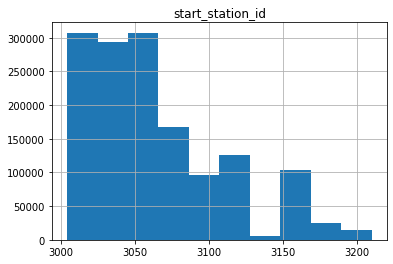

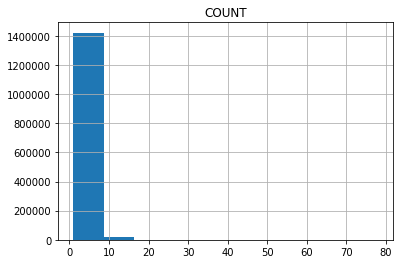

In [360]:
df.hist(column="start_station_id")
#df.hist(column="hour_of_day")
df.hist(column="COUNT")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e4d2692b0>]],
      dtype=object)

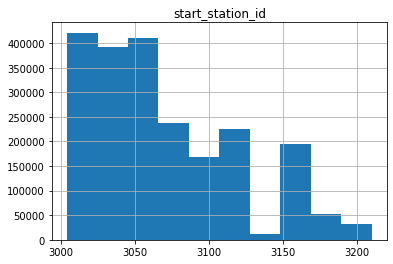

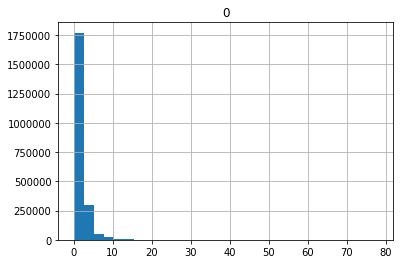

In [395]:
new_df.hist(column="start_station_id")
new_df.hist(column=0, bins=30)

In [364]:
new_df[0].value_counts()

0.0     3102534
1.0      730335
2.0      331724
3.0      162515
4.0       87278
5.0       48839
6.0       28483
7.0       17634
8.0       10954
9.0        7054
10.0       4693
11.0       3206
12.0       2208
13.0       1484
14.0       1005
15.0        731
16.0        526
17.0        367
18.0        278
19.0        199
20.0        148
21.0        111
22.0         95
24.0         75
23.0         65
26.0         44
25.0         42
28.0         32
27.0         27
29.0         26
30.0         26
31.0         21
32.0         15
34.0         11
35.0         10
33.0          9
37.0          5
41.0          5
36.0          4
49.0          3
38.0          3
39.0          3
48.0          3
46.0          2
40.0          2
42.0          2
53.0          1
57.0          1
51.0          1
52.0          1
60.0          1
50.0          1
45.0          1
78.0          1
61.0          1
Name: 0, dtype: int64

In [365]:
for index, row in new_df.iterrows():
    print(row[0], row['Datetime'])

0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
0.0 2015-04-23 07:00:00
2.0 2015-04-23 07:00:00
0.0 2015-04-23 0

1.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
1.0 2015-04-23 17:00:00
6.0 2015-04-23 17:00:00
1.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
2.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
1.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
4.0 2015-04-23 17:00:00
1.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
3.0 2015-04-23 17:00:00
1.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
1.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
0.0 2015-04-23 17:00:00
5.0 2015-04-23 17:00:00
2.0 2015-04-23 18:00:00
0.0 2015-04-23 18:00:00
0.0 2015-04-23 18:00:00
1.0 2015-04-23 18:00:00
0.0 2015-04-23 18:00:00
0.0 2015-04-23 1

0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
1.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
1.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
1.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
1.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 06:00:00
0.0 2015-04-24 07:00:00
0.0 2015-04-24 07:00:00
0.0 2015-04-24 07:00:00
1.0 2015-04-24 07:00:00
0.0 2015-04-24 07:00:00
0.0 2015-04-24 07:00:00
0.0 2015-04-24 07:00:00
0.0 2015-04-24 07:00:00
0.0 2015-04-24 07:00:00
0.0 2015-04-24 07:00:00
0.0 2015-04-24 07:00:00
0.0 2015-04-24 07:00:00
0.0 2015-04-24 0

4.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
2.0 2015-04-24 15:00:00
1.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
2.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
1.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
2.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
1.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
1.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
0.0 2015-04-24 15:00:00
1.0 2015-04-24 15:00:00
5.0 2015-04-24 16:00:00
0.0 2015-04-24 16:00:00
1.0 2015-04-24 16:00:00
0.0 2015-04-24 16:00:00
0.0 2015-04-24 16:00:00
5.0 2015-04-24 16:00:00
1.0 2015-04-24 16:00:00
1.0 2015-04-24 16:00:00
0.0 2015-04-24 16:00:00
0.0 2015-04-24 1

0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 00:00:00
0.0 2015-04-25 01:00:00
0.0 2015-04-25 01:00:00
0.0 2015-04-25 01:00:00
3.0 2015-04-25 01:00:00
0.0 2015-04-25 01:00:00
0.0 2015-04-25 01:00:00
0.0 2015-04-25 01:00:00
0.0 2015-04-25 01:00:00
0.0 2015-04-25 01:00:00
0.0 2015-04-25 01:00:00
1.0 2015-04-25 01:00:00
0.0 2015-04-25 01:00:00
0.0 2015-04-25 01:00:00
0.0 2015-04-25 01:00:00
0.0 2015-04-25 01:00:00
0.0 2015-04-25 01:00:00
0.0 2015-04-25 01:00:00
0.0 2015-04-25 01:00:00
0.0 2015-04-25 0

0.0 2015-04-25 09:00:00
1.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
1.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
1.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
1.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
1.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
1.0 2015-04-25 09:00:00
3.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
1.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
1.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
0.0 2015-04-25 09:00:00
2.0 2015-04-25 09:00:00
1.0 2015-04-25 10:00:00
0.0 2015-04-25 10:00:00
1.0 2015-04-25 10:00:00
3.0 2015-04-25 10:00:00
0.0 2015-04-25 10:00:00
1.0 2015-04-25 1

0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
2.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
3.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
1.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
2.0 2015-04-25 18:00:00
2.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
2.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
5.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
4.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
5.0 2015-04-25 18:00:00
4.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
6.0 2015-04-25 18:00:00
2.0 2015-04-25 18:00:00
3.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 18:00:00
0.0 2015-04-25 1

0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
1.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
1.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
1.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 03:00:00
0.0 2015-04-26 05:00:00
0.0 2015-04-26 05:00:00
0.0 2015-04-26 05:00:00
0.0 2015-04-26 05:00:00
0.0 2015-04-26 05:00:00
0.0 2015-04-26 05:00:00
0.0 2015-04-26 05:00:00
0.0 2015-04-26 05:00:00
0.0 2015-04-26 05:00:00
0.0 2015-04-26 0

1.0 2015-04-26 13:00:00
2.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
10.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
3.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
4.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
1.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
2.0 2015-04-26 13:00:00
2.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
2.0 2015-04-26 13:00:00
2.0 2015-04-26 13:00:00
1.0 2015-04-26 13:00:00
5.0 2015-04-26 13:00:00
2.0 2015-04-26 13:00:00
4.0 2015-04-26 13:00:00
2.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
1.0 2015-04-26 13:00:00
1.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
1.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
1.0 2015-04-26 13:00:00
1.0 2015-04-26 13:00:00
2.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
1.0 2015-04-26 13:00:00
6.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
0.0 2015-04-26 13:00:00
2.0 2015-04-26 

0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
1.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
1.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
3.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 22:00:00
0.0 2015-04-26 23:00:00
0.0 2015-04-26 23:00:00
3.0 2015-04-26 23:00:00
0.0 2015-04-26 23:00:00
3.0 2015-04-26 23:00:00
0.0 2015-04-26 23:00:00
0.0 2015-04-26 23:00:00
0.0 2015-04-26 23:00:00
1.0 2015-04-26 23:00:00
0.0 2015-04-26 23:00:00
0.0 2015-04-26 23:00:00
0.0 2015-04-26 23:00:00
0.0 2015-04-26 23:00:00
0.0 2015-04-26 23:00:00
0.0 2015-04-26 23:00:00
0.0 2015-04-26 23:00:00
0.0 2015-04-26 2

1.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
1.0 2015-04-27 11:00:00
2.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
1.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
1.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
3.0 2015-04-27 11:00:00
3.0 2015-04-27 11:00:00
1.0 2015-04-27 11:00:00
4.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
1.0 2015-04-27 11:00:00
1.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
1.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
1.0 2015-04-27 11:00:00
3.0 2015-04-27 11:00:00
2.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
1.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
0.0 2015-04-27 11:00:00
2.0 2015-04-27 1

0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
1.0 2015-04-27 20:00:00
1.0 2015-04-27 20:00:00
1.0 2015-04-27 20:00:00
3.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
1.0 2015-04-27 20:00:00
3.0 2015-04-27 20:00:00
1.0 2015-04-27 20:00:00
2.0 2015-04-27 20:00:00
1.0 2015-04-27 20:00:00
2.0 2015-04-27 20:00:00
1.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
1.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
1.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
2.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
1.0 2015-04-27 20:00:00
0.0 2015-04-27 20:00:00
3.0 2015-04-27 2

0.0 2015-04-28 06:00:00
2.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
2.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
1.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
0.0 2015-04-28 06:00:00
0.0 2015-04-28 07:00:00
0.0 2015-04-28 07:00:00
1.0 2015-04-28 07:00:00
1.0 2015-04-28 07:00:00
0.0 2015-04-28 07:00:00
0.0 2015-04-28 07:00:00
1.0 2015-04-28 07:00:00
0.0 2015-04-28 07:00:00
2.0 2015-04-28 07:00:00
0.0 2015-04-28 07:00:00
0.0 2015-04-28 07:00:00
0.0 2015-04-28 07:00:00
0.0 2015-04-28 07:00:00
0.0 2015-04-28 07:00:00
0.0 2015-04-28 07:00:00
0.0 2015-04-28 07:00:00
0.0 2015-04-28 07:00:00
1.0 2015-04-28 07:00:00
0.0 2015-04-28 07:00:00
0.0 2015-04-28 07:00:00
0.0 2015-04-28 0

4.0 2015-04-28 16:00:00
3.0 2015-04-28 16:00:00
2.0 2015-04-28 16:00:00
1.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
1.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
1.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
3.0 2015-04-28 16:00:00
4.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
1.0 2015-04-28 16:00:00
4.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
1.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
1.0 2015-04-28 16:00:00
4.0 2015-04-28 16:00:00
1.0 2015-04-28 16:00:00
4.0 2015-04-28 16:00:00
1.0 2015-04-28 16:00:00
1.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
1.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
1.0 2015-04-28 16:00:00
2.0 2015-04-28 16:00:00
0.0 2015-04-28 16:00:00
7.0 2015-04-28 1

0.0 2015-04-29 01:00:00
0.0 2015-04-29 01:00:00
0.0 2015-04-29 01:00:00
0.0 2015-04-29 01:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
1.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 02:00:00
0.0 2015-04-29 0

1.0 2015-04-29 13:00:00
1.0 2015-04-29 14:00:00
1.0 2015-04-29 14:00:00
2.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
1.0 2015-04-29 14:00:00
1.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
1.0 2015-04-29 14:00:00
1.0 2015-04-29 14:00:00
3.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
2.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
2.0 2015-04-29 14:00:00
3.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
1.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
2.0 2015-04-29 14:00:00
4.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
9.0 2015-04-29 14:00:00
2.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
1.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
0.0 2015-04-29 14:00:00
1.0 2015-04-29 14:00:00
1.0 2015-04-29 14:00:00
5.0 2015-04-29 14:00:00
2.0 2015-04-29 1

0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
2.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
4.0 2015-04-29 23:00:00
1.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
1.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
1.0 2015-04-29 23:00:00
3.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
2.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 23:00:00
0.0 2015-04-29 2

1.0 2015-04-30 09:00:00
0.0 2015-04-30 09:00:00
0.0 2015-04-30 09:00:00
0.0 2015-04-30 09:00:00
1.0 2015-04-30 09:00:00
2.0 2015-04-30 09:00:00
0.0 2015-04-30 09:00:00
1.0 2015-04-30 09:00:00
2.0 2015-04-30 09:00:00
0.0 2015-04-30 09:00:00
3.0 2015-04-30 09:00:00
0.0 2015-04-30 09:00:00
3.0 2015-04-30 09:00:00
2.0 2015-04-30 09:00:00
9.0 2015-04-30 09:00:00
1.0 2015-04-30 09:00:00
1.0 2015-04-30 09:00:00
0.0 2015-04-30 09:00:00
0.0 2015-04-30 09:00:00
1.0 2015-04-30 09:00:00
0.0 2015-04-30 09:00:00
1.0 2015-04-30 09:00:00
1.0 2015-04-30 09:00:00
3.0 2015-04-30 09:00:00
1.0 2015-04-30 09:00:00
2.0 2015-04-30 09:00:00
0.0 2015-04-30 09:00:00
2.0 2015-04-30 09:00:00
2.0 2015-04-30 09:00:00
0.0 2015-04-30 09:00:00
0.0 2015-04-30 09:00:00
4.0 2015-04-30 09:00:00
2.0 2015-04-30 09:00:00
0.0 2015-04-30 09:00:00
1.0 2015-04-30 09:00:00
5.0 2015-04-30 09:00:00
0.0 2015-04-30 09:00:00
2.0 2015-04-30 09:00:00
1.0 2015-04-30 09:00:00
1.0 2015-04-30 09:00:00
0.0 2015-04-30 09:00:00
1.0 2015-04-30 0

1.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
2.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
2.0 2015-04-30 18:00:00
1.0 2015-04-30 18:00:00
4.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
1.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
8.0 2015-04-30 18:00:00
1.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
1.0 2015-04-30 18:00:00
6.0 2015-04-30 18:00:00
1.0 2015-04-30 18:00:00
6.0 2015-04-30 18:00:00
2.0 2015-04-30 18:00:00
1.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
2.0 2015-04-30 18:00:00
3.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
1.0 2015-04-30 18:00:00
2.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
4.0 2015-04-30 18:00:00
1.0 2015-04-30 18:00:00
2.0 2015-04-30 18:00:00
0.0 2015-04-30 18:00:00
1.0 2015-04-30 18:00:00
3.0 2015-04-30 18:00:00
1.0 2015-04-30 19:00:00
1.0 2015-04-30 19:00:00
1.0 2015-04-30 1

0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 03:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 04:00:00
0.0 2015-05-01 0

1.0 2015-05-01 12:00:00
2.0 2015-05-01 12:00:00
3.0 2015-05-01 12:00:00
1.0 2015-05-01 12:00:00
0.0 2015-05-01 12:00:00
2.0 2015-05-01 12:00:00
1.0 2015-05-01 12:00:00
3.0 2015-05-01 12:00:00
0.0 2015-05-01 12:00:00
0.0 2015-05-01 12:00:00
0.0 2015-05-01 12:00:00
0.0 2015-05-01 12:00:00
0.0 2015-05-01 12:00:00
2.0 2015-05-01 12:00:00
0.0 2015-05-01 12:00:00
1.0 2015-05-01 12:00:00
1.0 2015-05-01 12:00:00
2.0 2015-05-01 12:00:00
0.0 2015-05-01 12:00:00
0.0 2015-05-01 12:00:00
0.0 2015-05-01 12:00:00
7.0 2015-05-01 12:00:00
5.0 2015-05-01 13:00:00
0.0 2015-05-01 13:00:00
2.0 2015-05-01 13:00:00
2.0 2015-05-01 13:00:00
0.0 2015-05-01 13:00:00
1.0 2015-05-01 13:00:00
1.0 2015-05-01 13:00:00
0.0 2015-05-01 13:00:00
3.0 2015-05-01 13:00:00
0.0 2015-05-01 13:00:00
0.0 2015-05-01 13:00:00
3.0 2015-05-01 13:00:00
0.0 2015-05-01 13:00:00
0.0 2015-05-01 13:00:00
6.0 2015-05-01 13:00:00
0.0 2015-05-01 13:00:00
2.0 2015-05-01 13:00:00
8.0 2015-05-01 13:00:00
0.0 2015-05-01 13:00:00
6.0 2015-05-01 1

0.0 2015-05-01 22:00:00
1.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
1.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
1.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
1.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
2.0 2015-05-01 22:00:00
1.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
8.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
1.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
1.0 2015-05-01 22:00:00
1.0 2015-05-01 22:00:00
4.0 2015-05-01 22:00:00
3.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
0.0 2015-05-01 22:00:00
3.0 2015-05-01 22:00:00
2.0 2015-05-01 2

0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
1.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
2.0 2015-05-02 07:00:00
1.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
1.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
2.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
1.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
1.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
1.0 2015-05-02 07:00:00
1.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
30.0 2015-05-02 07:00:00
0.0 2015-05-02 07:00:00
0.0 2015-05-02 

0.0 2015-05-02 16:00:00
0.0 2015-05-02 16:00:00
0.0 2015-05-02 16:00:00
0.0 2015-05-02 16:00:00
11.0 2015-05-02 16:00:00
8.0 2015-05-02 16:00:00
4.0 2015-05-02 16:00:00
6.0 2015-05-02 16:00:00
4.0 2015-05-02 16:00:00
3.0 2015-05-02 16:00:00
41.0 2015-05-02 16:00:00
3.0 2015-05-02 16:00:00
3.0 2015-05-02 16:00:00
1.0 2015-05-02 16:00:00
0.0 2015-05-02 16:00:00
1.0 2015-05-02 16:00:00
12.0 2015-05-02 16:00:00
3.0 2015-05-02 16:00:00
3.0 2015-05-02 16:00:00
5.0 2015-05-02 16:00:00
9.0 2015-05-02 16:00:00
1.0 2015-05-02 16:00:00
7.0 2015-05-02 16:00:00
1.0 2015-05-02 16:00:00
0.0 2015-05-02 16:00:00
0.0 2015-05-02 16:00:00
1.0 2015-05-02 16:00:00
4.0 2015-05-02 16:00:00
2.0 2015-05-02 16:00:00
7.0 2015-05-02 16:00:00
20.0 2015-05-02 16:00:00
0.0 2015-05-02 16:00:00
2.0 2015-05-02 16:00:00
3.0 2015-05-02 16:00:00
0.0 2015-05-02 16:00:00
0.0 2015-05-02 16:00:00
2.0 2015-05-02 16:00:00
7.0 2015-05-02 17:00:00
2.0 2015-05-02 17:00:00
2.0 2015-05-02 17:00:00
3.0 2015-05-02 17:00:00
0.0 2015-05-

0.0 2015-05-03 00:00:00
0.0 2015-05-03 00:00:00
0.0 2015-05-03 00:00:00
0.0 2015-05-03 00:00:00
0.0 2015-05-03 00:00:00
0.0 2015-05-03 00:00:00
0.0 2015-05-03 00:00:00
1.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
3.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
1.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
3.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
3.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
2.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
2.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 01:00:00
0.0 2015-05-03 0

0.0 2015-05-03 09:00:00
0.0 2015-05-03 09:00:00
0.0 2015-05-03 09:00:00
1.0 2015-05-03 09:00:00
3.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
1.0 2015-05-03 10:00:00
6.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
3.0 2015-05-03 10:00:00
3.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
1.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
5.0 2015-05-03 10:00:00
1.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
2.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
13.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
3.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
2.0 2015-05-03 10:00:00
23.0 2015-05-03 10:00:00
6.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
3.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
2.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
1.0 2015-05-03 10:00:00
0.0 2015-05-03 10:00:00
0.0 2015-05-03

1.0 2015-05-03 19:00:00
4.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
6.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
1.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
22.0 2015-05-03 19:00:00
7.0 2015-05-03 19:00:00
6.0 2015-05-03 19:00:00
1.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
3.0 2015-05-03 19:00:00
3.0 2015-05-03 19:00:00
6.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
6.0 2015-05-03 19:00:00
8.0 2015-05-03 19:00:00
2.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
1.0 2015-05-03 19:00:00
1.0 2015-05-03 19:00:00
5.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
9.0 2015-05-03 19:00:00
1.0 2015-05-03 19:00:00
3.0 2015-05-03 19:00:00
2.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
0.0 2015-05-03 19:00:00
1.0 2015-05-03 

0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
1.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 05:00:00
0.0 2015-05-04 06:00:00
0.0 2015-05-04 06:00:00
0.0 2015-05-04 06:00:00
0.0 2015-05-04 06:00:00
0.0 2015-05-04 06:00:00
0.0 2015-05-04 06:00:00
1.0 2015-05-04 06:00:00
1.0 2015-05-04 06:00:00
0.0 2015-05-04 06:00:00
0.0 2015-05-04 06:00:00
0.0 2015-05-04 06:00:00
0.0 2015-05-04 0

1.0 2015-05-04 14:00:00
5.0 2015-05-04 14:00:00
0.0 2015-05-04 14:00:00
3.0 2015-05-04 14:00:00
0.0 2015-05-04 14:00:00
1.0 2015-05-04 14:00:00
0.0 2015-05-04 14:00:00
1.0 2015-05-04 14:00:00
1.0 2015-05-04 14:00:00
0.0 2015-05-04 14:00:00
1.0 2015-05-04 14:00:00
3.0 2015-05-04 14:00:00
0.0 2015-05-04 14:00:00
0.0 2015-05-04 14:00:00
0.0 2015-05-04 14:00:00
1.0 2015-05-04 14:00:00
0.0 2015-05-04 14:00:00
2.0 2015-05-04 14:00:00
0.0 2015-05-04 14:00:00
3.0 2015-05-04 14:00:00
0.0 2015-05-04 14:00:00
0.0 2015-05-04 14:00:00
2.0 2015-05-04 14:00:00
0.0 2015-05-04 14:00:00
1.0 2015-05-04 15:00:00
0.0 2015-05-04 15:00:00
2.0 2015-05-04 15:00:00
1.0 2015-05-04 15:00:00
0.0 2015-05-04 15:00:00
4.0 2015-05-04 15:00:00
3.0 2015-05-04 15:00:00
1.0 2015-05-04 15:00:00
1.0 2015-05-04 15:00:00
0.0 2015-05-04 15:00:00
1.0 2015-05-04 15:00:00
0.0 2015-05-04 15:00:00
0.0 2015-05-04 15:00:00
0.0 2015-05-04 15:00:00
6.0 2015-05-04 15:00:00
0.0 2015-05-04 15:00:00
0.0 2015-05-04 15:00:00
0.0 2015-05-04 1

0.0 2015-05-04 23:00:00
0.0 2015-05-04 23:00:00
0.0 2015-05-04 23:00:00
0.0 2015-05-04 23:00:00
1.0 2015-05-04 23:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
1.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
1.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
1.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
1.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 00:00:00
0.0 2015-05-05 0

1.0 2015-05-05 10:00:00
1.0 2015-05-05 10:00:00
1.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
1.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
1.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
1.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
1.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
1.0 2015-05-05 10:00:00
1.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
2.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
2.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
2.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
1.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
2.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
1.0 2015-05-05 10:00:00
3.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
5.0 2015-05-05 10:00:00
1.0 2015-05-05 10:00:00
3.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
4.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
0.0 2015-05-05 10:00:00
1.0 2015-05-05 1

1.0 2015-05-05 19:00:00
3.0 2015-05-05 19:00:00
0.0 2015-05-05 19:00:00
0.0 2015-05-05 19:00:00
4.0 2015-05-05 19:00:00
0.0 2015-05-05 19:00:00
1.0 2015-05-05 19:00:00
2.0 2015-05-05 19:00:00
1.0 2015-05-05 19:00:00
1.0 2015-05-05 19:00:00
3.0 2015-05-05 19:00:00
8.0 2015-05-05 19:00:00
8.0 2015-05-05 19:00:00
0.0 2015-05-05 19:00:00
0.0 2015-05-05 19:00:00
1.0 2015-05-05 19:00:00
0.0 2015-05-05 19:00:00
3.0 2015-05-05 19:00:00
4.0 2015-05-05 19:00:00
1.0 2015-05-05 19:00:00
7.0 2015-05-05 19:00:00
2.0 2015-05-05 19:00:00
2.0 2015-05-05 19:00:00
1.0 2015-05-05 19:00:00
0.0 2015-05-05 19:00:00
2.0 2015-05-05 19:00:00
26.0 2015-05-05 19:00:00
0.0 2015-05-05 19:00:00
1.0 2015-05-05 19:00:00
3.0 2015-05-05 19:00:00
1.0 2015-05-05 19:00:00
1.0 2015-05-05 19:00:00
5.0 2015-05-05 19:00:00
5.0 2015-05-05 19:00:00
4.0 2015-05-05 19:00:00
0.0 2015-05-05 19:00:00
0.0 2015-05-05 19:00:00
3.0 2015-05-05 19:00:00
6.0 2015-05-05 19:00:00
2.0 2015-05-05 19:00:00
0.0 2015-05-05 19:00:00
6.0 2015-05-05 

0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
1.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 04:00:00
0.0 2015-05-06 0

15.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
1.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
1.0 2015-05-06 13:00:00
1.0 2015-05-06 13:00:00
1.0 2015-05-06 13:00:00
2.0 2015-05-06 13:00:00
3.0 2015-05-06 13:00:00
5.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
1.0 2015-05-06 13:00:00
1.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
1.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
1.0 2015-05-06 13:00:00
2.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
2.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
3.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
1.0 2015-05-06 13:00:00
1.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
1.0 2015-05-06 13:00:00
1.0 2015-05-06 13:00:00
4.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
4.0 2015-05-06 13:00:00
2.0 2015-05-06 13:00:00
1.0 2015-05-06 13:00:00
1.0 2015-05-06 13:00:00
0.0 2015-05-06 13:00:00
1.0 2015-05-06 

0.0 2015-05-06 22:00:00
1.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
2.0 2015-05-06 22:00:00
2.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
1.0 2015-05-06 22:00:00
2.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
3.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
1.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
1.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
1.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
0.0 2015-05-06 22:00:00
2.0 2015-05-06 22:00:00
0.0 2015-05-06 23:00:00
0.0 2015-05-06 23:00:00
0.0 2015-05-06 23:00:00
0.0 2015-05-06 23:00:00
0.0 2015-05-06 23:00:00
0.0 2015-05-06 2

1.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
1.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
1.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
4.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
1.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
1.0 2015-05-07 09:00:00
4.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
4.0 2015-05-07 09:00:00
3.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
1.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
6.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
3.0 2015-05-07 09:00:00
1.0 2015-05-07 09:00:00
1.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
5.0 2015-05-07 09:00:00
4.0 2015-05-07 09:00:00
0.0 2015-05-07 09:00:00
1.0 2015-05-07 0

0.0 2015-05-07 17:00:00
0.0 2015-05-07 17:00:00
0.0 2015-05-07 17:00:00
6.0 2015-05-07 17:00:00
6.0 2015-05-07 18:00:00
0.0 2015-05-07 18:00:00
0.0 2015-05-07 18:00:00
7.0 2015-05-07 18:00:00
0.0 2015-05-07 18:00:00
4.0 2015-05-07 18:00:00
10.0 2015-05-07 18:00:00
3.0 2015-05-07 18:00:00
1.0 2015-05-07 18:00:00
0.0 2015-05-07 18:00:00
2.0 2015-05-07 18:00:00
4.0 2015-05-07 18:00:00
0.0 2015-05-07 18:00:00
3.0 2015-05-07 18:00:00
1.0 2015-05-07 18:00:00
0.0 2015-05-07 18:00:00
7.0 2015-05-07 18:00:00
1.0 2015-05-07 18:00:00
5.0 2015-05-07 18:00:00
7.0 2015-05-07 18:00:00
0.0 2015-05-07 18:00:00
0.0 2015-05-07 18:00:00
3.0 2015-05-07 18:00:00
1.0 2015-05-07 18:00:00
4.0 2015-05-07 18:00:00
0.0 2015-05-07 18:00:00
4.0 2015-05-07 18:00:00
0.0 2015-05-07 18:00:00
7.0 2015-05-07 18:00:00
2.0 2015-05-07 18:00:00
3.0 2015-05-07 18:00:00
0.0 2015-05-07 18:00:00
2.0 2015-05-07 18:00:00
2.0 2015-05-07 18:00:00
0.0 2015-05-07 18:00:00
2.0 2015-05-07 18:00:00
0.0 2015-05-07 18:00:00
5.0 2015-05-07 

0.0 2015-05-08 02:00:00
0.0 2015-05-08 02:00:00
0.0 2015-05-08 02:00:00
0.0 2015-05-08 02:00:00
0.0 2015-05-08 02:00:00
0.0 2015-05-08 02:00:00
0.0 2015-05-08 02:00:00
0.0 2015-05-08 02:00:00
0.0 2015-05-08 02:00:00
0.0 2015-05-08 02:00:00
0.0 2015-05-08 02:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
1.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 03:00:00
0.0 2015-05-08 0

0.0 2015-05-08 11:00:00
2.0 2015-05-08 12:00:00
1.0 2015-05-08 12:00:00
4.0 2015-05-08 12:00:00
1.0 2015-05-08 12:00:00
0.0 2015-05-08 12:00:00
1.0 2015-05-08 12:00:00
5.0 2015-05-08 12:00:00
1.0 2015-05-08 12:00:00
2.0 2015-05-08 12:00:00
0.0 2015-05-08 12:00:00
1.0 2015-05-08 12:00:00
2.0 2015-05-08 12:00:00
0.0 2015-05-08 12:00:00
1.0 2015-05-08 12:00:00
3.0 2015-05-08 12:00:00
4.0 2015-05-08 12:00:00
3.0 2015-05-08 12:00:00
3.0 2015-05-08 12:00:00
2.0 2015-05-08 12:00:00
5.0 2015-05-08 12:00:00
0.0 2015-05-08 12:00:00
0.0 2015-05-08 12:00:00
0.0 2015-05-08 12:00:00
0.0 2015-05-08 12:00:00
0.0 2015-05-08 12:00:00
4.0 2015-05-08 12:00:00
0.0 2015-05-08 12:00:00
0.0 2015-05-08 12:00:00
3.0 2015-05-08 12:00:00
1.0 2015-05-08 12:00:00
2.0 2015-05-08 12:00:00
0.0 2015-05-08 12:00:00
1.0 2015-05-08 12:00:00
0.0 2015-05-08 12:00:00
0.0 2015-05-08 12:00:00
2.0 2015-05-08 12:00:00
4.0 2015-05-08 12:00:00
0.0 2015-05-08 12:00:00
1.0 2015-05-08 12:00:00
1.0 2015-05-08 12:00:00
1.0 2015-05-08 1

1.0 2015-05-08 21:00:00
3.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
3.0 2015-05-08 21:00:00
2.0 2015-05-08 21:00:00
2.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
1.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
3.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
5.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
1.0 2015-05-08 21:00:00
2.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
1.0 2015-05-08 21:00:00
5.0 2015-05-08 21:00:00
1.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
0.0 2015-05-08 21:00:00
1.0 2015-05-08 22:00:00
3.0 2015-05-08 22:00:00
1.0 2015-05-08 22:00:00
2.0 2015-05-08 22:00:00
0.0 2015-05-08 22:00:00
2.0 2015-05-08 2

0.0 2015-05-09 06:00:00
1.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
1.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
1.0 2015-05-09 06:00:00
1.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
1.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
1.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
0.0 2015-05-09 06:00:00
1.0 2015-05-09 0

8.0 2015-05-09 14:00:00
0.0 2015-05-09 14:00:00
0.0 2015-05-09 14:00:00
3.0 2015-05-09 14:00:00
6.0 2015-05-09 14:00:00
0.0 2015-05-09 14:00:00
7.0 2015-05-09 14:00:00
0.0 2015-05-09 14:00:00
3.0 2015-05-09 14:00:00
0.0 2015-05-09 14:00:00
1.0 2015-05-09 14:00:00
0.0 2015-05-09 14:00:00
1.0 2015-05-09 14:00:00
2.0 2015-05-09 14:00:00
0.0 2015-05-09 14:00:00
0.0 2015-05-09 14:00:00
1.0 2015-05-09 14:00:00
0.0 2015-05-09 14:00:00
0.0 2015-05-09 14:00:00
0.0 2015-05-09 14:00:00
1.0 2015-05-09 14:00:00
4.0 2015-05-09 14:00:00
1.0 2015-05-09 14:00:00
3.0 2015-05-09 14:00:00
3.0 2015-05-09 14:00:00
1.0 2015-05-09 14:00:00
4.0 2015-05-09 14:00:00
0.0 2015-05-09 14:00:00
1.0 2015-05-09 14:00:00
4.0 2015-05-09 14:00:00
2.0 2015-05-09 15:00:00
4.0 2015-05-09 15:00:00
1.0 2015-05-09 15:00:00
2.0 2015-05-09 15:00:00
2.0 2015-05-09 15:00:00
1.0 2015-05-09 15:00:00
10.0 2015-05-09 15:00:00
1.0 2015-05-09 15:00:00
3.0 2015-05-09 15:00:00
1.0 2015-05-09 15:00:00
0.0 2015-05-09 15:00:00
6.0 2015-05-09 

3.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
2.0 2015-05-09 23:00:00
1.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
3.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
9.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
2.0 2015-05-09 23:00:00
4.0 2015-05-09 23:00:00
2.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
2.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
1.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
1.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
2.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
2.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
0.0 2015-05-09 23:00:00
1.0 2015-05-09 2

0.0 2015-05-10 10:00:00
2.0 2015-05-10 10:00:00
1.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
1.0 2015-05-10 10:00:00
1.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
1.0 2015-05-10 10:00:00
4.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
2.0 2015-05-10 10:00:00
2.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
1.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
8.0 2015-05-10 10:00:00
5.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
3.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
2.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
2.0 2015-05-10 10:00:00
2.0 2015-05-10 10:00:00
0.0 2015-05-10 10:00:00
1.0 2015-05-10 10:00:00
1.0 2015-05-10 10:00:00
0.0 2015-05-10 11:00:00
1.0 2015-05-10 11:00:00
2.0 2015-05-10 11:00:00
4.0 2015-05-10 1

2.0 2015-05-10 19:00:00
6.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
4.0 2015-05-10 20:00:00
2.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
3.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
3.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
3.0 2015-05-10 20:00:00
2.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
1.0 2015-05-10 20:00:00
1.0 2015-05-10 20:00:00
4.0 2015-05-10 20:00:00
3.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
1.0 2015-05-10 20:00:00
1.0 2015-05-10 20:00:00
1.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
1.0 2015-05-10 20:00:00
2.0 2015-05-10 20:00:00
3.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
2.0 2015-05-10 20:00:00
1.0 2015-05-10 20:00:00
0.0 2015-05-10 20:00:00
3.0 2015-05-10 20:00:00
5.0 2015-05-10 2

0.0 2015-05-11 05:00:00
3.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
1.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
1.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
1.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
3.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
0.0 2015-05-11 05:00:00
1.0 2015-05-11 0

1.0 2015-05-11 14:00:00
2.0 2015-05-11 14:00:00
0.0 2015-05-11 14:00:00
2.0 2015-05-11 14:00:00
1.0 2015-05-11 14:00:00
0.0 2015-05-11 14:00:00
0.0 2015-05-11 14:00:00
1.0 2015-05-11 14:00:00
3.0 2015-05-11 15:00:00
0.0 2015-05-11 15:00:00
0.0 2015-05-11 15:00:00
1.0 2015-05-11 15:00:00
0.0 2015-05-11 15:00:00
5.0 2015-05-11 15:00:00
5.0 2015-05-11 15:00:00
0.0 2015-05-11 15:00:00
2.0 2015-05-11 15:00:00
0.0 2015-05-11 15:00:00
2.0 2015-05-11 15:00:00
1.0 2015-05-11 15:00:00
0.0 2015-05-11 15:00:00
0.0 2015-05-11 15:00:00
2.0 2015-05-11 15:00:00
2.0 2015-05-11 15:00:00
0.0 2015-05-11 15:00:00
4.0 2015-05-11 15:00:00
4.0 2015-05-11 15:00:00
5.0 2015-05-11 15:00:00
0.0 2015-05-11 15:00:00
1.0 2015-05-11 15:00:00
2.0 2015-05-11 15:00:00
2.0 2015-05-11 15:00:00
1.0 2015-05-11 15:00:00
5.0 2015-05-11 15:00:00
0.0 2015-05-11 15:00:00
1.0 2015-05-11 15:00:00
2.0 2015-05-11 15:00:00
1.0 2015-05-11 15:00:00
2.0 2015-05-11 15:00:00
0.0 2015-05-11 15:00:00
1.0 2015-05-11 15:00:00
18.0 2015-05-11 

0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
0.0 2015-05-11 23:00:00
1.0 2015-05-12 00:00:00
0.0 2015-05-12 00:00:00
2.0 2015-05-12 00:00:00
0.0 2015-05-12 00:00:00
1.0 2015-05-12 00:00:00
1.0 2015-05-12 00:00:00
0.0 2015-05-12 00:00:00
0.0 2015-05-12 00:00:00
0.0 2015-05-12 00:00:00
0.0 2015-05-12 00:00:00
0.0 2015-05-12 00:00:00
0.0 2015-05-12 00:00:00
0.0 2015-05-12 00:00:00
0.0 2015-05-12 00:00:00
0.0 2015-05-12 00:00:00
0.0 2015-05-12 00:00:00
0.0 2015-05-12 00:00:00
0.0 2015-05-12 00:00:00
1.0 2015-05-12 00:00:00
4.0 2015-05-12 00:00:00
0.0 2015-05-12 0

0.0 2015-05-12 10:00:00
2.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
2.0 2015-05-12 10:00:00
2.0 2015-05-12 10:00:00
2.0 2015-05-12 10:00:00
1.0 2015-05-12 10:00:00
1.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
1.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
2.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
2.0 2015-05-12 10:00:00
1.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
2.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
2.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
2.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
0.0 2015-05-12 10:00:00
2.0 2015-05-12 11:00:00
0.0 2015-05-12 11:00:00
1.0 2015-05-12 11:00:00
3.0 2015-05-12 11:00:00
1.0 2015-05-12 1

0.0 2015-05-12 19:00:00
0.0 2015-05-12 19:00:00
0.0 2015-05-12 19:00:00
1.0 2015-05-12 19:00:00
2.0 2015-05-12 19:00:00
0.0 2015-05-12 19:00:00
1.0 2015-05-12 19:00:00
3.0 2015-05-12 19:00:00
1.0 2015-05-12 19:00:00
2.0 2015-05-12 19:00:00
0.0 2015-05-12 19:00:00
4.0 2015-05-12 19:00:00
3.0 2015-05-12 19:00:00
9.0 2015-05-12 19:00:00
2.0 2015-05-12 19:00:00
0.0 2015-05-12 19:00:00
2.0 2015-05-12 19:00:00
3.0 2015-05-12 19:00:00
3.0 2015-05-12 19:00:00
5.0 2015-05-12 19:00:00
3.0 2015-05-12 19:00:00
3.0 2015-05-12 19:00:00
3.0 2015-05-12 19:00:00
3.0 2015-05-12 19:00:00
3.0 2015-05-12 19:00:00
2.0 2015-05-12 19:00:00
1.0 2015-05-12 19:00:00
0.0 2015-05-12 19:00:00
0.0 2015-05-12 19:00:00
0.0 2015-05-12 19:00:00
0.0 2015-05-12 19:00:00
2.0 2015-05-12 19:00:00
0.0 2015-05-12 19:00:00
1.0 2015-05-12 19:00:00
2.0 2015-05-12 19:00:00
2.0 2015-05-12 19:00:00
3.0 2015-05-12 19:00:00
0.0 2015-05-12 19:00:00
0.0 2015-05-12 19:00:00
0.0 2015-05-12 19:00:00
6.0 2015-05-12 20:00:00
0.0 2015-05-12 2

0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
2.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
1.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
0.0 2015-05-13 04:00:00
1.0 2015-05-13 05:00:00
0.0 2015-05-13 05:00:00
1.0 2015-05-13 05:00:00
3.0 2015-05-13 05:00:00
0.0 2015-05-13 05:00:00
0.0 2015-05-13 05:00:00
1.0 2015-05-13 05:00:00
0.0 2015-05-13 05:00:00
1.0 2015-05-13 05:00:00
0.0 2015-05-13 05:00:00
0.0 2015-05-13 05:00:00
0.0 2015-05-13 05:00:00
0.0 2015-05-13 05:00:00
0.0 2015-05-13 05:00:00
1.0 2015-05-13 05:00:00
0.0 2015-05-13 05:00:00
0.0 2015-05-13 05:00:00
0.0 2015-05-13 0

1.0 2015-05-13 13:00:00
3.0 2015-05-13 13:00:00
1.0 2015-05-13 13:00:00
0.0 2015-05-13 13:00:00
1.0 2015-05-13 13:00:00
3.0 2015-05-13 13:00:00
1.0 2015-05-13 13:00:00
0.0 2015-05-13 13:00:00
1.0 2015-05-13 13:00:00
0.0 2015-05-13 13:00:00
0.0 2015-05-13 13:00:00
0.0 2015-05-13 13:00:00
0.0 2015-05-13 13:00:00
0.0 2015-05-13 13:00:00
0.0 2015-05-13 13:00:00
0.0 2015-05-13 13:00:00
1.0 2015-05-13 13:00:00
1.0 2015-05-13 13:00:00
2.0 2015-05-13 13:00:00
0.0 2015-05-13 13:00:00
0.0 2015-05-13 13:00:00
4.0 2015-05-13 13:00:00
2.0 2015-05-13 14:00:00
0.0 2015-05-13 14:00:00
2.0 2015-05-13 14:00:00
4.0 2015-05-13 14:00:00
0.0 2015-05-13 14:00:00
2.0 2015-05-13 14:00:00
3.0 2015-05-13 14:00:00
0.0 2015-05-13 14:00:00
2.0 2015-05-13 14:00:00
1.0 2015-05-13 14:00:00
2.0 2015-05-13 14:00:00
2.0 2015-05-13 14:00:00
0.0 2015-05-13 14:00:00
0.0 2015-05-13 14:00:00
4.0 2015-05-13 14:00:00
1.0 2015-05-13 14:00:00
2.0 2015-05-13 14:00:00
2.0 2015-05-13 14:00:00
0.0 2015-05-13 14:00:00
4.0 2015-05-13 1

0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
2.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
1.0 2015-05-13 22:00:00
2.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
1.0 2015-05-13 22:00:00
2.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
1.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 22:00:00
0.0 2015-05-13 23:00:00
1.0 2015-05-13 23:00:00
0.0 2015-05-13 23:00:00
0.0 2015-05-13 23:00:00
0.0 2015-05-13 23:00:00
0.0 2015-05-13 23:00:00
0.0 2015-05-13 23:00:00
0.0 2015-05-13 23:00:00
0.0 2015-05-13 23:00:00
0.0 2015-05-13 23:00:00
0.0 2015-05-13 2

0.0 2015-05-14 08:00:00
0.0 2015-05-14 08:00:00
1.0 2015-05-14 08:00:00
3.0 2015-05-14 08:00:00
4.0 2015-05-14 08:00:00
3.0 2015-05-14 08:00:00
7.0 2015-05-14 08:00:00
0.0 2015-05-14 08:00:00
2.0 2015-05-14 08:00:00
2.0 2015-05-14 08:00:00
1.0 2015-05-14 08:00:00
2.0 2015-05-14 08:00:00
7.0 2015-05-14 08:00:00
1.0 2015-05-14 08:00:00
1.0 2015-05-14 08:00:00
2.0 2015-05-14 08:00:00
2.0 2015-05-14 08:00:00
3.0 2015-05-14 08:00:00
0.0 2015-05-14 08:00:00
3.0 2015-05-14 08:00:00
4.0 2015-05-14 08:00:00
1.0 2015-05-14 08:00:00
1.0 2015-05-14 08:00:00
2.0 2015-05-14 08:00:00
7.0 2015-05-14 08:00:00
6.0 2015-05-14 08:00:00
1.0 2015-05-14 08:00:00
0.0 2015-05-14 08:00:00
0.0 2015-05-14 08:00:00
1.0 2015-05-14 08:00:00
5.0 2015-05-14 08:00:00
1.0 2015-05-14 08:00:00
0.0 2015-05-14 08:00:00
3.0 2015-05-14 08:00:00
2.0 2015-05-14 08:00:00
2.0 2015-05-14 08:00:00
0.0 2015-05-14 08:00:00
1.0 2015-05-14 08:00:00
0.0 2015-05-14 08:00:00
4.0 2015-05-14 09:00:00
3.0 2015-05-14 09:00:00
1.0 2015-05-14 0

1.0 2015-05-14 17:00:00
4.0 2015-05-14 17:00:00
4.0 2015-05-14 17:00:00
9.0 2015-05-14 17:00:00
6.0 2015-05-14 17:00:00
2.0 2015-05-14 17:00:00
1.0 2015-05-14 17:00:00
0.0 2015-05-14 17:00:00
0.0 2015-05-14 17:00:00
2.0 2015-05-14 17:00:00
2.0 2015-05-14 17:00:00
0.0 2015-05-14 17:00:00
4.0 2015-05-14 17:00:00
3.0 2015-05-14 17:00:00
1.0 2015-05-14 17:00:00
0.0 2015-05-14 17:00:00
0.0 2015-05-14 17:00:00
0.0 2015-05-14 17:00:00
6.0 2015-05-14 17:00:00
9.0 2015-05-14 18:00:00
3.0 2015-05-14 18:00:00
3.0 2015-05-14 18:00:00
7.0 2015-05-14 18:00:00
2.0 2015-05-14 18:00:00
4.0 2015-05-14 18:00:00
8.0 2015-05-14 18:00:00
0.0 2015-05-14 18:00:00
2.0 2015-05-14 18:00:00
3.0 2015-05-14 18:00:00
3.0 2015-05-14 18:00:00
7.0 2015-05-14 18:00:00
0.0 2015-05-14 18:00:00
0.0 2015-05-14 18:00:00
5.0 2015-05-14 18:00:00
3.0 2015-05-14 18:00:00
2.0 2015-05-14 18:00:00
3.0 2015-05-14 18:00:00
7.0 2015-05-14 18:00:00
0.0 2015-05-14 18:00:00
0.0 2015-05-14 18:00:00
0.0 2015-05-14 18:00:00
2.0 2015-05-14 1

0.0 2015-05-15 03:00:00
0.0 2015-05-15 03:00:00
0.0 2015-05-15 03:00:00
0.0 2015-05-15 03:00:00
0.0 2015-05-15 03:00:00
0.0 2015-05-15 03:00:00
0.0 2015-05-15 03:00:00
0.0 2015-05-15 03:00:00
0.0 2015-05-15 03:00:00
0.0 2015-05-15 03:00:00
0.0 2015-05-15 03:00:00
0.0 2015-05-15 03:00:00
0.0 2015-05-15 03:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
1.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 04:00:00
0.0 2015-05-15 0

1.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
1.0 2015-05-15 13:00:00
1.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
1.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
1.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
9.0 2015-05-15 13:00:00
1.0 2015-05-15 13:00:00
1.0 2015-05-15 13:00:00
7.0 2015-05-15 13:00:00
4.0 2015-05-15 13:00:00
9.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
2.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
3.0 2015-05-15 13:00:00
3.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
2.0 2015-05-15 13:00:00
1.0 2015-05-15 13:00:00
5.0 2015-05-15 13:00:00
1.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
4.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
1.0 2015-05-15 13:00:00
1.0 2015-05-15 13:00:00
1.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
4.0 2015-05-15 13:00:00
1.0 2015-05-15 13:00:00
1.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
0.0 2015-05-15 13:00:00
2.0 2015-05-15 1

3.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
1.0 2015-05-15 22:00:00
2.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
4.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
1.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
1.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
1.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
1.0 2015-05-15 22:00:00
3.0 2015-05-15 22:00:00
1.0 2015-05-15 22:00:00
4.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
3.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
5.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
2.0 2015-05-15 22:00:00
4.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
2.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
3.0 2015-05-15 22:00:00
1.0 2015-05-15 22:00:00
0.0 2015-05-15 22:00:00
1.0 2015-05-15 2

0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
1.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 06:00:00
0.0 2015-05-16 07:00:00
0.0 2015-05-16 07:00:00
1.0 2015-05-16 07:00:00
0.0 2015-05-16 07:00:00
0.0 2015-05-16 07:00:00
1.0 2015-05-16 07:00:00
0.0 2015-05-16 07:00:00
0.0 2015-05-16 07:00:00
0.0 2015-05-16 07:00:00
1.0 2015-05-16 07:00:00
0.0 2015-05-16 07:00:00
1.0 2015-05-16 07:00:00
0.0 2015-05-16 07:00:00
0.0 2015-05-16 07:00:00
2.0 2015-05-16 07:00:00
0.0 2015-05-16 0

0.0 2015-05-16 15:00:00
3.0 2015-05-16 15:00:00
0.0 2015-05-16 15:00:00
0.0 2015-05-16 15:00:00
0.0 2015-05-16 15:00:00
2.0 2015-05-16 15:00:00
6.0 2015-05-16 15:00:00
2.0 2015-05-16 15:00:00
2.0 2015-05-16 15:00:00
2.0 2015-05-16 15:00:00
1.0 2015-05-16 15:00:00
0.0 2015-05-16 15:00:00
0.0 2015-05-16 15:00:00
1.0 2015-05-16 15:00:00
2.0 2015-05-16 16:00:00
2.0 2015-05-16 16:00:00
2.0 2015-05-16 16:00:00
2.0 2015-05-16 16:00:00
1.0 2015-05-16 16:00:00
3.0 2015-05-16 16:00:00
3.0 2015-05-16 16:00:00
0.0 2015-05-16 16:00:00
3.0 2015-05-16 16:00:00
1.0 2015-05-16 16:00:00
3.0 2015-05-16 16:00:00
0.0 2015-05-16 16:00:00
0.0 2015-05-16 16:00:00
0.0 2015-05-16 16:00:00
3.0 2015-05-16 16:00:00
1.0 2015-05-16 16:00:00
1.0 2015-05-16 16:00:00
0.0 2015-05-16 16:00:00
2.0 2015-05-16 16:00:00
12.0 2015-05-16 16:00:00
0.0 2015-05-16 16:00:00
3.0 2015-05-16 16:00:00
1.0 2015-05-16 16:00:00
0.0 2015-05-16 16:00:00
7.0 2015-05-16 16:00:00
3.0 2015-05-16 16:00:00
15.0 2015-05-16 16:00:00
1.0 2015-05-16

0.0 2015-05-17 00:00:00
0.0 2015-05-17 00:00:00
1.0 2015-05-17 00:00:00
0.0 2015-05-17 00:00:00
1.0 2015-05-17 00:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
4.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
1.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 01:00:00
0.0 2015-05-17 0

3.0 2015-05-17 09:00:00
1.0 2015-05-17 09:00:00
2.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
1.0 2015-05-17 09:00:00
6.0 2015-05-17 09:00:00
1.0 2015-05-17 09:00:00
1.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
2.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
2.0 2015-05-17 09:00:00
4.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
1.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
2.0 2015-05-17 09:00:00
1.0 2015-05-17 09:00:00
3.0 2015-05-17 09:00:00
1.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
0.0 2015-05-17 09:00:00
1.0 2015-05-17 10:00:00
1.0 2015-05-17 10:00:00
2.0 2015-05-17 10:00:00
2.0 2015-05-17 10:00:00
0.0 2015-05-17 10:00:00
0.0 2015-05-17 10:00:00
6.0 2015-05-17 10:00:00
0.0 2015-05-17 10:00:00
2.0 2015-05-17 10:00:00
2.0 2015-05-17 1

4.0 2015-05-17 19:00:00
4.0 2015-05-17 19:00:00
1.0 2015-05-17 19:00:00
1.0 2015-05-17 19:00:00
1.0 2015-05-17 19:00:00
5.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
2.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
1.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
3.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
2.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
6.0 2015-05-17 19:00:00
4.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
1.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
2.0 2015-05-17 19:00:00
6.0 2015-05-17 19:00:00
4.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
3.0 2015-05-17 19:00:00
1.0 2015-05-17 19:00:00
2.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
3.0 2015-05-17 19:00:00
1.0 2015-05-17 19:00:00
7.0 2015-05-17 19:00:00
6.0 2015-05-17 19:00:00
5.0 2015-05-17 19:00:00
3.0 2015-05-17 19:00:00
0.0 2015-05-17 19:00:00
3.0 2015-05-17 1

0.0 2015-05-18 03:00:00
0.0 2015-05-18 03:00:00
0.0 2015-05-18 03:00:00
0.0 2015-05-18 03:00:00
0.0 2015-05-18 03:00:00
0.0 2015-05-18 03:00:00
0.0 2015-05-18 03:00:00
0.0 2015-05-18 03:00:00
0.0 2015-05-18 03:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
1.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 04:00:00
0.0 2015-05-18 0

0.0 2015-05-18 11:00:00
0.0 2015-05-18 11:00:00
0.0 2015-05-18 11:00:00
2.0 2015-05-18 11:00:00
0.0 2015-05-18 11:00:00
2.0 2015-05-18 11:00:00
0.0 2015-05-18 11:00:00
0.0 2015-05-18 11:00:00
0.0 2015-05-18 12:00:00
0.0 2015-05-18 12:00:00
4.0 2015-05-18 12:00:00
4.0 2015-05-18 12:00:00
0.0 2015-05-18 12:00:00
1.0 2015-05-18 12:00:00
4.0 2015-05-18 12:00:00
0.0 2015-05-18 12:00:00
0.0 2015-05-18 12:00:00
0.0 2015-05-18 12:00:00
0.0 2015-05-18 12:00:00
0.0 2015-05-18 12:00:00
0.0 2015-05-18 12:00:00
0.0 2015-05-18 12:00:00
2.0 2015-05-18 12:00:00
2.0 2015-05-18 12:00:00
2.0 2015-05-18 12:00:00
1.0 2015-05-18 12:00:00
2.0 2015-05-18 12:00:00
2.0 2015-05-18 12:00:00
0.0 2015-05-18 12:00:00
1.0 2015-05-18 12:00:00
1.0 2015-05-18 12:00:00
1.0 2015-05-18 12:00:00
2.0 2015-05-18 12:00:00
0.0 2015-05-18 12:00:00
1.0 2015-05-18 12:00:00
1.0 2015-05-18 12:00:00
0.0 2015-05-18 12:00:00
3.0 2015-05-18 12:00:00
0.0 2015-05-18 12:00:00
0.0 2015-05-18 12:00:00
3.0 2015-05-18 12:00:00
2.0 2015-05-18 1

6.0 2015-05-18 19:00:00
2.0 2015-05-18 19:00:00
2.0 2015-05-18 19:00:00
0.0 2015-05-18 19:00:00
0.0 2015-05-18 19:00:00
0.0 2015-05-18 19:00:00
0.0 2015-05-18 19:00:00
2.0 2015-05-18 19:00:00
0.0 2015-05-18 19:00:00
1.0 2015-05-18 19:00:00
1.0 2015-05-18 19:00:00
0.0 2015-05-18 19:00:00
0.0 2015-05-18 19:00:00
0.0 2015-05-18 19:00:00
0.0 2015-05-18 19:00:00
0.0 2015-05-18 19:00:00
1.0 2015-05-18 19:00:00
0.0 2015-05-18 20:00:00
0.0 2015-05-18 20:00:00
0.0 2015-05-18 20:00:00
2.0 2015-05-18 20:00:00
1.0 2015-05-18 20:00:00
2.0 2015-05-18 20:00:00
3.0 2015-05-18 20:00:00
3.0 2015-05-18 20:00:00
1.0 2015-05-18 20:00:00
0.0 2015-05-18 20:00:00
0.0 2015-05-18 20:00:00
0.0 2015-05-18 20:00:00
0.0 2015-05-18 20:00:00
0.0 2015-05-18 20:00:00
3.0 2015-05-18 20:00:00
2.0 2015-05-18 20:00:00
3.0 2015-05-18 20:00:00
0.0 2015-05-18 20:00:00
2.0 2015-05-18 20:00:00
4.0 2015-05-18 20:00:00
0.0 2015-05-18 20:00:00
3.0 2015-05-18 20:00:00
0.0 2015-05-18 20:00:00
1.0 2015-05-18 20:00:00
0.0 2015-05-18 2

0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
0.0 2015-05-19 04:00:00
1.0 2015-05-19 05:00:00
0.0 2015-05-19 05:00:00
0.0 2015-05-19 05:00:00
0.0 2015-05-19 05:00:00
0.0 2015-05-19 05:00:00
0.0 2015-05-19 05:00:00
0.0 2015-05-19 05:00:00
0.0 2015-05-19 05:00:00
2.0 2015-05-19 05:00:00
0.0 2015-05-19 05:00:00
0.0 2015-05-19 05:00:00
0.0 2015-05-19 05:00:00
0.0 2015-05-19 0

0.0 2015-05-19 12:00:00
2.0 2015-05-19 12:00:00
5.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
1.0 2015-05-19 13:00:00
1.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
4.0 2015-05-19 13:00:00
1.0 2015-05-19 13:00:00
1.0 2015-05-19 13:00:00
1.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
4.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
1.0 2015-05-19 13:00:00
4.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
2.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
1.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
1.0 2015-05-19 13:00:00
1.0 2015-05-19 13:00:00
4.0 2015-05-19 13:00:00
1.0 2015-05-19 13:00:00
4.0 2015-05-19 13:00:00
1.0 2015-05-19 13:00:00
1.0 2015-05-19 13:00:00
1.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
1.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
5.0 2015-05-19 13:00:00
2.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
0.0 2015-05-19 13:00:00
2.0 2015-05-19 1

4.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
2.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
2.0 2015-05-19 21:00:00
2.0 2015-05-19 21:00:00
1.0 2015-05-19 21:00:00
1.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
3.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
2.0 2015-05-19 21:00:00
1.0 2015-05-19 21:00:00
4.0 2015-05-19 21:00:00
3.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
5.0 2015-05-19 21:00:00
3.0 2015-05-19 21:00:00
2.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
1.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
1.0 2015-05-19 21:00:00
3.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
4.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
0.0 2015-05-19 21:00:00
2.0 2015-05-19 21:00:00
3.0 2015-05-19 21:00:00
0.0 2015-05-19 2

1.0 2015-05-20 05:00:00
1.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
2.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
3.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
1.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 05:00:00
0.0 2015-05-20 06:00:00
0.0 2015-05-20 06:00:00
0.0 2015-05-20 06:00:00
2.0 2015-05-20 06:00:00
1.0 2015-05-20 06:00:00
0.0 2015-05-20 06:00:00
2.0 2015-05-20 06:00:00
1.0 2015-05-20 06:00:00
1.0 2015-05-20 06:00:00
1.0 2015-05-20 06:00:00
0.0 2015-05-20 06:00:00
0.0 2015-05-20 06:00:00
0.0 2015-05-20 06:00:00
0.0 2015-05-20 06:00:00
0.0 2015-05-20 06:00:00
0.0 2015-05-20 06:00:00
0.0 2015-05-20 0

0.0 2015-05-20 14:00:00
0.0 2015-05-20 14:00:00
0.0 2015-05-20 14:00:00
1.0 2015-05-20 14:00:00
4.0 2015-05-20 15:00:00
0.0 2015-05-20 15:00:00
2.0 2015-05-20 15:00:00
1.0 2015-05-20 15:00:00
2.0 2015-05-20 15:00:00
2.0 2015-05-20 15:00:00
9.0 2015-05-20 15:00:00
2.0 2015-05-20 15:00:00
4.0 2015-05-20 15:00:00
5.0 2015-05-20 15:00:00
1.0 2015-05-20 15:00:00
1.0 2015-05-20 15:00:00
0.0 2015-05-20 15:00:00
1.0 2015-05-20 15:00:00
7.0 2015-05-20 15:00:00
0.0 2015-05-20 15:00:00
8.0 2015-05-20 15:00:00
4.0 2015-05-20 15:00:00
2.0 2015-05-20 15:00:00
8.0 2015-05-20 15:00:00
0.0 2015-05-20 15:00:00
0.0 2015-05-20 15:00:00
1.0 2015-05-20 15:00:00
1.0 2015-05-20 15:00:00
2.0 2015-05-20 15:00:00
5.0 2015-05-20 15:00:00
0.0 2015-05-20 15:00:00
2.0 2015-05-20 15:00:00
3.0 2015-05-20 15:00:00
5.0 2015-05-20 15:00:00
2.0 2015-05-20 15:00:00
0.0 2015-05-20 15:00:00
0.0 2015-05-20 15:00:00
0.0 2015-05-20 15:00:00
0.0 2015-05-20 15:00:00
1.0 2015-05-20 15:00:00
0.0 2015-05-20 15:00:00
1.0 2015-05-20 1

0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
1.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
2.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
1.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
1.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
3.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
1.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
1.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
2.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
2.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
1.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-20 23:00:00
0.0 2015-05-21 00:00:00
4.0 2015-05-21 00:00:00
0.0 2015-05-21 00:00:00
0.0 2015-05-21 00:00:00
0.0 2015-05-21 0

0.0 2015-05-21 08:00:00
2.0 2015-05-21 08:00:00
0.0 2015-05-21 08:00:00
2.0 2015-05-21 08:00:00
0.0 2015-05-21 08:00:00
0.0 2015-05-21 08:00:00
1.0 2015-05-21 08:00:00
2.0 2015-05-21 08:00:00
2.0 2015-05-21 08:00:00
2.0 2015-05-21 08:00:00
2.0 2015-05-21 08:00:00
3.0 2015-05-21 08:00:00
0.0 2015-05-21 08:00:00
3.0 2015-05-21 08:00:00
0.0 2015-05-21 08:00:00
0.0 2015-05-21 08:00:00
7.0 2015-05-21 08:00:00
2.0 2015-05-21 08:00:00
0.0 2015-05-21 08:00:00
6.0 2015-05-21 08:00:00
2.0 2015-05-21 08:00:00
4.0 2015-05-21 08:00:00
0.0 2015-05-21 08:00:00
2.0 2015-05-21 08:00:00
4.0 2015-05-21 08:00:00
2.0 2015-05-21 08:00:00
4.0 2015-05-21 08:00:00
0.0 2015-05-21 08:00:00
4.0 2015-05-21 08:00:00
5.0 2015-05-21 08:00:00
0.0 2015-05-21 08:00:00
0.0 2015-05-21 08:00:00
0.0 2015-05-21 08:00:00
3.0 2015-05-21 08:00:00
3.0 2015-05-21 08:00:00
0.0 2015-05-21 08:00:00
3.0 2015-05-21 08:00:00
1.0 2015-05-21 08:00:00
1.0 2015-05-21 08:00:00
3.0 2015-05-21 08:00:00
0.0 2015-05-21 08:00:00
1.0 2015-05-21 0

1.0 2015-05-21 17:00:00
2.0 2015-05-21 17:00:00
1.0 2015-05-21 17:00:00
0.0 2015-05-21 17:00:00
1.0 2015-05-21 17:00:00
2.0 2015-05-21 17:00:00
1.0 2015-05-21 17:00:00
0.0 2015-05-21 17:00:00
4.0 2015-05-21 17:00:00
1.0 2015-05-21 17:00:00
1.0 2015-05-21 17:00:00
0.0 2015-05-21 17:00:00
0.0 2015-05-21 17:00:00
3.0 2015-05-21 17:00:00
0.0 2015-05-21 17:00:00
0.0 2015-05-21 17:00:00
3.0 2015-05-21 17:00:00
2.0 2015-05-21 17:00:00
0.0 2015-05-21 17:00:00
0.0 2015-05-21 17:00:00
0.0 2015-05-21 17:00:00
0.0 2015-05-21 17:00:00
1.0 2015-05-21 17:00:00
1.0 2015-05-21 17:00:00
0.0 2015-05-21 17:00:00
1.0 2015-05-21 17:00:00
0.0 2015-05-21 17:00:00
0.0 2015-05-21 17:00:00
0.0 2015-05-21 17:00:00
3.0 2015-05-21 17:00:00
1.0 2015-05-21 17:00:00
3.0 2015-05-21 17:00:00
3.0 2015-05-21 18:00:00
0.0 2015-05-21 18:00:00
1.0 2015-05-21 18:00:00
4.0 2015-05-21 18:00:00
1.0 2015-05-21 18:00:00
2.0 2015-05-21 18:00:00
4.0 2015-05-21 18:00:00
1.0 2015-05-21 18:00:00
1.0 2015-05-21 18:00:00
1.0 2015-05-21 1

0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
2.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
1.0 2015-05-22 02:00:00
1.0 2015-05-22 02:00:00
1.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 02:00:00
0.0 2015-05-22 03:00:00
0.0 2015-05-22 03:00:00
0.0 2015-05-22 03:00:00
0.0 2015-05-22 0

0.0 2015-05-22 13:00:00
1.0 2015-05-22 13:00:00
1.0 2015-05-22 13:00:00
0.0 2015-05-22 13:00:00
4.0 2015-05-22 13:00:00
2.0 2015-05-22 13:00:00
2.0 2015-05-22 13:00:00
0.0 2015-05-22 13:00:00
3.0 2015-05-22 13:00:00
2.0 2015-05-22 13:00:00
4.0 2015-05-22 13:00:00
0.0 2015-05-22 13:00:00
0.0 2015-05-22 13:00:00
0.0 2015-05-22 13:00:00
0.0 2015-05-22 13:00:00
0.0 2015-05-22 13:00:00
4.0 2015-05-22 13:00:00
1.0 2015-05-22 13:00:00
1.0 2015-05-22 13:00:00
0.0 2015-05-22 13:00:00
0.0 2015-05-22 13:00:00
1.0 2015-05-22 13:00:00
0.0 2015-05-22 13:00:00
1.0 2015-05-22 13:00:00
0.0 2015-05-22 13:00:00
2.0 2015-05-22 14:00:00
2.0 2015-05-22 14:00:00
3.0 2015-05-22 14:00:00
2.0 2015-05-22 14:00:00
0.0 2015-05-22 14:00:00
7.0 2015-05-22 14:00:00
6.0 2015-05-22 14:00:00
0.0 2015-05-22 14:00:00
1.0 2015-05-22 14:00:00
2.0 2015-05-22 14:00:00
1.0 2015-05-22 14:00:00
1.0 2015-05-22 14:00:00
0.0 2015-05-22 14:00:00
0.0 2015-05-22 14:00:00
4.0 2015-05-22 14:00:00
1.0 2015-05-22 14:00:00
1.0 2015-05-22 1

0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
2.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
1.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
1.0 2015-05-23 01:00:00
1.0 2015-05-23 01:00:00
2.0 2015-05-23 01:00:00
2.0 2015-05-23 01:00:00
1.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
2.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 01:00:00
0.0 2015-05-23 0

1.0 2015-05-23 11:00:00
2.0 2015-05-23 11:00:00
1.0 2015-05-23 11:00:00
1.0 2015-05-23 11:00:00
4.0 2015-05-23 11:00:00
0.0 2015-05-23 11:00:00
5.0 2015-05-23 11:00:00
6.0 2015-05-23 11:00:00
6.0 2015-05-23 11:00:00
0.0 2015-05-23 11:00:00
2.0 2015-05-23 11:00:00
2.0 2015-05-23 11:00:00
1.0 2015-05-23 11:00:00
1.0 2015-05-23 11:00:00
2.0 2015-05-23 11:00:00
1.0 2015-05-23 11:00:00
0.0 2015-05-23 11:00:00
0.0 2015-05-23 11:00:00
1.0 2015-05-23 11:00:00
1.0 2015-05-23 11:00:00
0.0 2015-05-23 11:00:00
0.0 2015-05-23 11:00:00
0.0 2015-05-23 11:00:00
0.0 2015-05-23 11:00:00
0.0 2015-05-23 11:00:00
2.0 2015-05-23 11:00:00
1.0 2015-05-23 11:00:00
0.0 2015-05-23 11:00:00
4.0 2015-05-23 12:00:00
0.0 2015-05-23 12:00:00
4.0 2015-05-23 12:00:00
6.0 2015-05-23 12:00:00
0.0 2015-05-23 12:00:00
1.0 2015-05-23 12:00:00
1.0 2015-05-23 12:00:00
0.0 2015-05-23 12:00:00
4.0 2015-05-23 12:00:00
0.0 2015-05-23 12:00:00
0.0 2015-05-23 12:00:00
3.0 2015-05-23 12:00:00
0.0 2015-05-23 12:00:00
0.0 2015-05-23 1

2.0 2015-05-23 20:00:00
0.0 2015-05-23 20:00:00
3.0 2015-05-23 20:00:00
0.0 2015-05-23 20:00:00
0.0 2015-05-23 20:00:00
0.0 2015-05-23 20:00:00
2.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
2.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
1.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
3.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
6.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
1.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
2.0 2015-05-23 21:00:00
3.0 2015-05-23 21:00:00
4.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
4.0 2015-05-23 21:00:00
1.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
1.0 2015-05-23 21:00:00
2.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
2.0 2015-05-23 21:00:00
2.0 2015-05-23 21:00:00
1.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
1.0 2015-05-23 21:00:00
0.0 2015-05-23 21:00:00
0.0 2015-05-23 2

1.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
1.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
1.0 2015-05-24 06:00:00
0.0 2015-05-24 06:00:00
1.0 2015-05-24 0

0.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
3.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
2.0 2015-05-24 15:00:00
4.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
4.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
1.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
2.0 2015-05-24 15:00:00
13.0 2015-05-24 15:00:00
3.0 2015-05-24 15:00:00
4.0 2015-05-24 15:00:00
11.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
8.0 2015-05-24 15:00:00
13.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
3.0 2015-05-24 15:00:00
2.0 2015-05-24 15:00:00
6.0 2015-05-24 15:00:00
15.0 2015-05-24 15:00:00
5.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
5.0 2015-05-24 15:00:00
3.0 2015-05-24 15:00:00
7.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
1.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
3.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
0.0 2015-05-24 15:00:00
1.0 2015-05-24 15:00:00
1.0 2015-05-24 15:00:00
2.0 2015-05-

0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
3.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
1.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
4.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
1.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
1.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
1.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
1.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
1.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
2.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
3.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 00:00:00
0.0 2015-05-25 0

1.0 2015-05-25 09:00:00
0.0 2015-05-25 09:00:00
2.0 2015-05-25 09:00:00
0.0 2015-05-25 09:00:00
1.0 2015-05-25 09:00:00
0.0 2015-05-25 09:00:00
3.0 2015-05-25 09:00:00
0.0 2015-05-25 09:00:00
0.0 2015-05-25 09:00:00
5.0 2015-05-25 09:00:00
2.0 2015-05-25 09:00:00
0.0 2015-05-25 09:00:00
1.0 2015-05-25 09:00:00
1.0 2015-05-25 09:00:00
0.0 2015-05-25 09:00:00
4.0 2015-05-25 09:00:00
4.0 2015-05-25 09:00:00
0.0 2015-05-25 09:00:00
0.0 2015-05-25 09:00:00
2.0 2015-05-25 09:00:00
1.0 2015-05-25 09:00:00
2.0 2015-05-25 09:00:00
1.0 2015-05-25 09:00:00
0.0 2015-05-25 09:00:00
1.0 2015-05-25 09:00:00
0.0 2015-05-25 09:00:00
1.0 2015-05-25 09:00:00
3.0 2015-05-25 09:00:00
0.0 2015-05-25 09:00:00
4.0 2015-05-25 09:00:00
0.0 2015-05-25 10:00:00
0.0 2015-05-25 10:00:00
2.0 2015-05-25 10:00:00
3.0 2015-05-25 10:00:00
0.0 2015-05-25 10:00:00
0.0 2015-05-25 10:00:00
2.0 2015-05-25 10:00:00
1.0 2015-05-25 10:00:00
4.0 2015-05-25 10:00:00
0.0 2015-05-25 10:00:00
0.0 2015-05-25 10:00:00
0.0 2015-05-25 1

0.0 2015-05-25 18:00:00
4.0 2015-05-25 18:00:00
0.0 2015-05-25 18:00:00
1.0 2015-05-25 18:00:00
2.0 2015-05-25 18:00:00
0.0 2015-05-25 18:00:00
0.0 2015-05-25 18:00:00
0.0 2015-05-25 18:00:00
1.0 2015-05-25 18:00:00
1.0 2015-05-25 18:00:00
1.0 2015-05-25 18:00:00
0.0 2015-05-25 19:00:00
5.0 2015-05-25 19:00:00
8.0 2015-05-25 19:00:00
3.0 2015-05-25 19:00:00
0.0 2015-05-25 19:00:00
2.0 2015-05-25 19:00:00
5.0 2015-05-25 19:00:00
0.0 2015-05-25 19:00:00
2.0 2015-05-25 19:00:00
1.0 2015-05-25 19:00:00
0.0 2015-05-25 19:00:00
3.0 2015-05-25 19:00:00
0.0 2015-05-25 19:00:00
0.0 2015-05-25 19:00:00
3.0 2015-05-25 19:00:00
0.0 2015-05-25 19:00:00
3.0 2015-05-25 19:00:00
0.0 2015-05-25 19:00:00
3.0 2015-05-25 19:00:00
7.0 2015-05-25 19:00:00
0.0 2015-05-25 19:00:00
0.0 2015-05-25 19:00:00
10.0 2015-05-25 19:00:00
4.0 2015-05-25 19:00:00
4.0 2015-05-25 19:00:00
1.0 2015-05-25 19:00:00
2.0 2015-05-25 19:00:00
0.0 2015-05-25 19:00:00
7.0 2015-05-25 19:00:00
2.0 2015-05-25 19:00:00
3.0 2015-05-25 

0.0 2015-05-26 02:00:00
0.0 2015-05-26 02:00:00
0.0 2015-05-26 02:00:00
0.0 2015-05-26 02:00:00
0.0 2015-05-26 02:00:00
0.0 2015-05-26 02:00:00
0.0 2015-05-26 02:00:00
0.0 2015-05-26 02:00:00
0.0 2015-05-26 02:00:00
0.0 2015-05-26 02:00:00
0.0 2015-05-26 02:00:00
0.0 2015-05-26 02:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
1.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 03:00:00
0.0 2015-05-26 0

0.0 2015-05-26 11:00:00
2.0 2015-05-26 11:00:00
2.0 2015-05-26 11:00:00
0.0 2015-05-26 11:00:00
0.0 2015-05-26 11:00:00
0.0 2015-05-26 11:00:00
0.0 2015-05-26 11:00:00
3.0 2015-05-26 11:00:00
0.0 2015-05-26 11:00:00
0.0 2015-05-26 11:00:00
0.0 2015-05-26 11:00:00
0.0 2015-05-26 11:00:00
1.0 2015-05-26 11:00:00
4.0 2015-05-26 11:00:00
2.0 2015-05-26 11:00:00
3.0 2015-05-26 11:00:00
1.0 2015-05-26 11:00:00
2.0 2015-05-26 11:00:00
1.0 2015-05-26 11:00:00
1.0 2015-05-26 11:00:00
1.0 2015-05-26 11:00:00
0.0 2015-05-26 11:00:00
0.0 2015-05-26 11:00:00
2.0 2015-05-26 11:00:00
1.0 2015-05-26 11:00:00
5.0 2015-05-26 11:00:00
1.0 2015-05-26 11:00:00
0.0 2015-05-26 11:00:00
0.0 2015-05-26 11:00:00
0.0 2015-05-26 11:00:00
2.0 2015-05-26 11:00:00
0.0 2015-05-26 11:00:00
0.0 2015-05-26 11:00:00
1.0 2015-05-26 11:00:00
2.0 2015-05-26 12:00:00
1.0 2015-05-26 12:00:00
4.0 2015-05-26 12:00:00
2.0 2015-05-26 12:00:00
0.0 2015-05-26 12:00:00
1.0 2015-05-26 12:00:00
4.0 2015-05-26 12:00:00
0.0 2015-05-26 1

0.0 2015-05-26 20:00:00
5.0 2015-05-26 20:00:00
1.0 2015-05-26 20:00:00
0.0 2015-05-26 20:00:00
0.0 2015-05-26 20:00:00
4.0 2015-05-26 20:00:00
2.0 2015-05-26 20:00:00
1.0 2015-05-26 20:00:00
3.0 2015-05-26 20:00:00
2.0 2015-05-26 20:00:00
2.0 2015-05-26 20:00:00
0.0 2015-05-26 20:00:00
3.0 2015-05-26 20:00:00
3.0 2015-05-26 20:00:00
3.0 2015-05-26 20:00:00
3.0 2015-05-26 20:00:00
0.0 2015-05-26 20:00:00
2.0 2015-05-26 20:00:00
0.0 2015-05-26 20:00:00
2.0 2015-05-26 20:00:00
8.0 2015-05-26 20:00:00
5.0 2015-05-26 20:00:00
1.0 2015-05-26 20:00:00
0.0 2015-05-26 20:00:00
4.0 2015-05-26 20:00:00
1.0 2015-05-26 20:00:00
6.0 2015-05-26 20:00:00
1.0 2015-05-26 20:00:00
0.0 2015-05-26 20:00:00
0.0 2015-05-26 20:00:00
0.0 2015-05-26 20:00:00
0.0 2015-05-26 20:00:00
0.0 2015-05-26 20:00:00
0.0 2015-05-26 20:00:00
5.0 2015-05-26 20:00:00
0.0 2015-05-26 20:00:00
1.0 2015-05-26 20:00:00
0.0 2015-05-26 20:00:00
3.0 2015-05-26 20:00:00
0.0 2015-05-26 20:00:00
1.0 2015-05-26 20:00:00
0.0 2015-05-26 2

0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
3.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
1.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
1.0 2015-05-27 05:00:00
1.0 2015-05-27 05:00:00
1.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
1.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
2.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
1.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
2.0 2015-05-27 05:00:00
0.0 2015-05-27 05:00:00
1.0 2015-05-27 0

0.0 2015-05-27 14:00:00
0.0 2015-05-27 14:00:00
0.0 2015-05-27 14:00:00
0.0 2015-05-27 14:00:00
1.0 2015-05-27 14:00:00
1.0 2015-05-27 14:00:00
1.0 2015-05-27 14:00:00
1.0 2015-05-27 14:00:00
0.0 2015-05-27 14:00:00
3.0 2015-05-27 14:00:00
3.0 2015-05-27 14:00:00
0.0 2015-05-27 14:00:00
1.0 2015-05-27 14:00:00
0.0 2015-05-27 14:00:00
0.0 2015-05-27 14:00:00
0.0 2015-05-27 14:00:00
1.0 2015-05-27 14:00:00
1.0 2015-05-27 14:00:00
1.0 2015-05-27 14:00:00
2.0 2015-05-27 14:00:00
1.0 2015-05-27 14:00:00
1.0 2015-05-27 14:00:00
0.0 2015-05-27 14:00:00
8.0 2015-05-27 14:00:00
1.0 2015-05-27 14:00:00
2.0 2015-05-27 14:00:00
0.0 2015-05-27 14:00:00
2.0 2015-05-27 14:00:00
2.0 2015-05-27 14:00:00
2.0 2015-05-27 14:00:00
3.0 2015-05-27 14:00:00
2.0 2015-05-27 14:00:00
3.0 2015-05-27 14:00:00
1.0 2015-05-27 14:00:00
0.0 2015-05-27 14:00:00
1.0 2015-05-27 14:00:00
0.0 2015-05-27 14:00:00
3.0 2015-05-27 14:00:00
1.0 2015-05-27 14:00:00
0.0 2015-05-27 14:00:00
0.0 2015-05-27 14:00:00
0.0 2015-05-27 1

1.0 2015-05-27 22:00:00
1.0 2015-05-27 22:00:00
2.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
2.0 2015-05-27 22:00:00
1.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
2.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
1.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
2.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
1.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
0.0 2015-05-27 22:00:00
2.0 2015-05-27 22:00:00
1.0 2015-05-27 23:00:00
0.0 2015-05-27 23:00:00
0.0 2015-05-27 23:00:00
0.0 2015-05-27 23:00:00
0.0 2015-05-27 23:00:00
1.0 2015-05-27 23:00:00
2.0 2015-05-27 23:00:00
1.0 2015-05-27 23:00:00
2.0 2015-05-27 23:00:00
0.0 2015-05-27 23:00:00
0.0 2015-05-27 23:00:00
2.0 2015-05-27 23:00:00
0.0 2015-05-27 23:00:00
0.0 2015-05-27 2

1.0 2015-05-28 07:00:00
1.0 2015-05-28 07:00:00
3.0 2015-05-28 07:00:00
1.0 2015-05-28 07:00:00
1.0 2015-05-28 07:00:00
0.0 2015-05-28 07:00:00
2.0 2015-05-28 07:00:00
1.0 2015-05-28 07:00:00
1.0 2015-05-28 07:00:00
7.0 2015-05-28 07:00:00
2.0 2015-05-28 07:00:00
4.0 2015-05-28 07:00:00
0.0 2015-05-28 07:00:00
0.0 2015-05-28 07:00:00
3.0 2015-05-28 07:00:00
2.0 2015-05-28 07:00:00
1.0 2015-05-28 07:00:00
2.0 2015-05-28 07:00:00
4.0 2015-05-28 07:00:00
1.0 2015-05-28 07:00:00
2.0 2015-05-28 07:00:00
2.0 2015-05-28 07:00:00
0.0 2015-05-28 07:00:00
0.0 2015-05-28 07:00:00
0.0 2015-05-28 08:00:00
0.0 2015-05-28 08:00:00
4.0 2015-05-28 08:00:00
7.0 2015-05-28 08:00:00
0.0 2015-05-28 08:00:00
0.0 2015-05-28 08:00:00
4.0 2015-05-28 08:00:00
0.0 2015-05-28 08:00:00
12.0 2015-05-28 08:00:00
3.0 2015-05-28 08:00:00
2.0 2015-05-28 08:00:00
0.0 2015-05-28 08:00:00
0.0 2015-05-28 08:00:00
0.0 2015-05-28 08:00:00
3.0 2015-05-28 08:00:00
0.0 2015-05-28 08:00:00
1.0 2015-05-28 08:00:00
0.0 2015-05-28 

0.0 2015-05-28 16:00:00
0.0 2015-05-28 16:00:00
0.0 2015-05-28 16:00:00
2.0 2015-05-28 16:00:00
1.0 2015-05-28 16:00:00
4.0 2015-05-28 16:00:00
2.0 2015-05-28 16:00:00
1.0 2015-05-28 16:00:00
3.0 2015-05-28 16:00:00
2.0 2015-05-28 16:00:00
1.0 2015-05-28 16:00:00
1.0 2015-05-28 16:00:00
1.0 2015-05-28 16:00:00
0.0 2015-05-28 16:00:00
5.0 2015-05-28 16:00:00
1.0 2015-05-28 16:00:00
4.0 2015-05-28 16:00:00
0.0 2015-05-28 16:00:00
0.0 2015-05-28 16:00:00
0.0 2015-05-28 16:00:00
0.0 2015-05-28 16:00:00
0.0 2015-05-28 16:00:00
0.0 2015-05-28 16:00:00
1.0 2015-05-28 16:00:00
0.0 2015-05-28 16:00:00
0.0 2015-05-28 16:00:00
0.0 2015-05-28 16:00:00
1.0 2015-05-28 16:00:00
1.0 2015-05-28 16:00:00
0.0 2015-05-28 16:00:00
7.0 2015-05-28 16:00:00
4.0 2015-05-28 17:00:00
1.0 2015-05-28 17:00:00
6.0 2015-05-28 17:00:00
6.0 2015-05-28 17:00:00
1.0 2015-05-28 17:00:00
6.0 2015-05-28 17:00:00
9.0 2015-05-28 17:00:00
0.0 2015-05-28 17:00:00
3.0 2015-05-28 17:00:00
0.0 2015-05-28 17:00:00
4.0 2015-05-28 1

0.0 2015-05-29 01:00:00
1.0 2015-05-29 01:00:00
1.0 2015-05-29 01:00:00
0.0 2015-05-29 01:00:00
0.0 2015-05-29 01:00:00
0.0 2015-05-29 01:00:00
0.0 2015-05-29 01:00:00
1.0 2015-05-29 01:00:00
0.0 2015-05-29 01:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
1.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
2.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
1.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 02:00:00
0.0 2015-05-29 0

1.0 2015-05-29 10:00:00
1.0 2015-05-29 10:00:00
2.0 2015-05-29 10:00:00
1.0 2015-05-29 10:00:00
5.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
1.0 2015-05-29 10:00:00
1.0 2015-05-29 10:00:00
1.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
2.0 2015-05-29 10:00:00
1.0 2015-05-29 10:00:00
1.0 2015-05-29 10:00:00
3.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
3.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
2.0 2015-05-29 10:00:00
1.0 2015-05-29 10:00:00
1.0 2015-05-29 10:00:00
3.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
3.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
1.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
3.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
1.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
1.0 2015-05-29 10:00:00
1.0 2015-05-29 10:00:00
1.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
0.0 2015-05-29 10:00:00
1.0 2015-05-29 10:00:00
0.0 2015-05-29 1

3.0 2015-05-29 18:00:00
0.0 2015-05-29 18:00:00
5.0 2015-05-29 18:00:00
1.0 2015-05-29 18:00:00
2.0 2015-05-29 18:00:00
1.0 2015-05-29 18:00:00
1.0 2015-05-29 18:00:00
0.0 2015-05-29 18:00:00
1.0 2015-05-29 18:00:00
2.0 2015-05-29 19:00:00
0.0 2015-05-29 19:00:00
2.0 2015-05-29 19:00:00
10.0 2015-05-29 19:00:00
0.0 2015-05-29 19:00:00
7.0 2015-05-29 19:00:00
14.0 2015-05-29 19:00:00
0.0 2015-05-29 19:00:00
1.0 2015-05-29 19:00:00
2.0 2015-05-29 19:00:00
3.0 2015-05-29 19:00:00
1.0 2015-05-29 19:00:00
0.0 2015-05-29 19:00:00
0.0 2015-05-29 19:00:00
1.0 2015-05-29 19:00:00
1.0 2015-05-29 19:00:00
0.0 2015-05-29 19:00:00
4.0 2015-05-29 19:00:00
1.0 2015-05-29 19:00:00
10.0 2015-05-29 19:00:00
0.0 2015-05-29 19:00:00
6.0 2015-05-29 19:00:00
9.0 2015-05-29 19:00:00
0.0 2015-05-29 19:00:00
2.0 2015-05-29 19:00:00
1.0 2015-05-29 19:00:00
3.0 2015-05-29 19:00:00
1.0 2015-05-29 19:00:00
4.0 2015-05-29 19:00:00
2.0 2015-05-29 19:00:00
1.0 2015-05-29 19:00:00
0.0 2015-05-29 19:00:00
2.0 2015-05-2

4.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
5.0 2015-05-30 03:00:00
1.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
3.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
2.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
1.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
1.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 03:00:00
0.0 2015-05-30 0

0.0 2015-05-30 11:00:00
0.0 2015-05-30 11:00:00
4.0 2015-05-30 11:00:00
0.0 2015-05-30 11:00:00
3.0 2015-05-30 11:00:00
2.0 2015-05-30 11:00:00
3.0 2015-05-30 11:00:00
0.0 2015-05-30 11:00:00
0.0 2015-05-30 11:00:00
0.0 2015-05-30 11:00:00
2.0 2015-05-30 11:00:00
1.0 2015-05-30 11:00:00
2.0 2015-05-30 11:00:00
2.0 2015-05-30 11:00:00
1.0 2015-05-30 11:00:00
3.0 2015-05-30 11:00:00
1.0 2015-05-30 11:00:00
0.0 2015-05-30 11:00:00
2.0 2015-05-30 11:00:00
1.0 2015-05-30 11:00:00
4.0 2015-05-30 12:00:00
2.0 2015-05-30 12:00:00
1.0 2015-05-30 12:00:00
4.0 2015-05-30 12:00:00
0.0 2015-05-30 12:00:00
1.0 2015-05-30 12:00:00
8.0 2015-05-30 12:00:00
1.0 2015-05-30 12:00:00
5.0 2015-05-30 12:00:00
1.0 2015-05-30 12:00:00
4.0 2015-05-30 12:00:00
2.0 2015-05-30 12:00:00
0.0 2015-05-30 12:00:00
1.0 2015-05-30 12:00:00
0.0 2015-05-30 12:00:00
0.0 2015-05-30 12:00:00
1.0 2015-05-30 12:00:00
3.0 2015-05-30 12:00:00
0.0 2015-05-30 12:00:00
0.0 2015-05-30 12:00:00
0.0 2015-05-30 12:00:00
3.0 2015-05-30 1

0.0 2015-05-30 20:00:00
0.0 2015-05-30 20:00:00
0.0 2015-05-30 20:00:00
0.0 2015-05-30 20:00:00
2.0 2015-05-30 20:00:00
0.0 2015-05-30 20:00:00
0.0 2015-05-30 20:00:00
0.0 2015-05-30 20:00:00
2.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
5.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
1.0 2015-05-30 21:00:00
1.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
2.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
1.0 2015-05-30 21:00:00
2.0 2015-05-30 21:00:00
3.0 2015-05-30 21:00:00
3.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
1.0 2015-05-30 21:00:00
4.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
5.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
2.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
2.0 2015-05-30 21:00:00
1.0 2015-05-30 21:00:00
2.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
0.0 2015-05-30 21:00:00
1.0 2015-05-30 2

0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
1.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
1.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 06:00:00
0.0 2015-05-31 0

3.0 2015-05-31 14:00:00
5.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
2.0 2015-05-31 15:00:00
7.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
2.0 2015-05-31 15:00:00
2.0 2015-05-31 15:00:00
2.0 2015-05-31 15:00:00
3.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
4.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
10.0 2015-05-31 15:00:00
2.0 2015-05-31 15:00:00
3.0 2015-05-31 15:00:00
2.0 2015-05-31 15:00:00
1.0 2015-05-31 15:00:00
9.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
1.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
5.0 2015-05-31 15:00:00
1.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
4.0 2015-05-31 15:00:00
3.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
1.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
5.0 2015-05-31 15:00:00
0.0 2015-05-31 15:00:00
3.0 2015-05-31 15:00:00
0.0 2015-05-31 

0.0 2015-05-31 23:00:00
0.0 2015-05-31 23:00:00
0.0 2015-05-31 23:00:00
0.0 2015-05-31 23:00:00
0.0 2015-05-31 23:00:00
0.0 2015-05-31 23:00:00
0.0 2015-05-31 23:00:00
1.0 2015-05-31 23:00:00
1.0 2015-05-31 23:00:00
0.0 2015-05-31 23:00:00
0.0 2015-05-31 23:00:00
0.0 2015-05-31 23:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
1.0 2015-06-01 00:00:00
2.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
1.0 2015-06-01 00:00:00
5.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 00:00:00
0.0 2015-06-01 0

1.0 2015-06-01 08:00:00
0.0 2015-06-01 08:00:00
3.0 2015-06-01 08:00:00
2.0 2015-06-01 08:00:00
0.0 2015-06-01 08:00:00
3.0 2015-06-01 08:00:00
0.0 2015-06-01 08:00:00
1.0 2015-06-01 08:00:00
0.0 2015-06-01 08:00:00
5.0 2015-06-01 09:00:00
1.0 2015-06-01 09:00:00
1.0 2015-06-01 09:00:00
1.0 2015-06-01 09:00:00
0.0 2015-06-01 09:00:00
0.0 2015-06-01 09:00:00
4.0 2015-06-01 09:00:00
0.0 2015-06-01 09:00:00
1.0 2015-06-01 09:00:00
1.0 2015-06-01 09:00:00
1.0 2015-06-01 09:00:00
0.0 2015-06-01 09:00:00
0.0 2015-06-01 09:00:00
0.0 2015-06-01 09:00:00
0.0 2015-06-01 09:00:00
0.0 2015-06-01 09:00:00
0.0 2015-06-01 09:00:00
1.0 2015-06-01 09:00:00
3.0 2015-06-01 09:00:00
0.0 2015-06-01 09:00:00
0.0 2015-06-01 09:00:00
1.0 2015-06-01 09:00:00
1.0 2015-06-01 09:00:00
0.0 2015-06-01 09:00:00
2.0 2015-06-01 09:00:00
0.0 2015-06-01 09:00:00
1.0 2015-06-01 09:00:00
1.0 2015-06-01 09:00:00
0.0 2015-06-01 09:00:00
1.0 2015-06-01 09:00:00
1.0 2015-06-01 09:00:00
0.0 2015-06-01 09:00:00
1.0 2015-06-01 0

0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
1.0 2015-06-01 18:00:00
1.0 2015-06-01 18:00:00
3.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
1.0 2015-06-01 18:00:00
2.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
1.0 2015-06-01 18:00:00
1.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
1.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
1.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
1.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
1.0 2015-06-01 18:00:00
1.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
1.0 2015-06-01 18:00:00
0.0 2015-06-01 18:00:00
2.0 2015-06-01 18:00:00
0.0 2015-06-01 1

0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
1.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 03:00:00
0.0 2015-06-02 0

0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
1.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
1.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
1.0 2015-06-02 13:00:00
1.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
0.0 2015-06-02 13:00:00
1.0 2015-06-02 14:00:00
0.0 2015-06-02 14:00:00
0.0 2015-06-02 14:00:00
2.0 2015-06-02 14:00:00
0.0 2015-06-02 14:00:00
0.0 2015-06-02 14:00:00
3.0 2015-06-02 14:00:00
0.0 2015-06-02 14:00:00
1.0 2015-06-02 14:00:00
1.0 2015-06-02 14:00:00
0.0 2015-06-02 14:00:00
2.0 2015-06-02 14:00:00
0.0 2015-06-02 14:00:00
0.0 2015-06-02 14:00:00
0.0 2015-06-02 14:00:00
1.0 2015-06-02 14:00:00
1.0 2015-06-02 14:00:00
2.0 2015-06-02 1

0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
1.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
1.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
1.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
1.0 2015-06-02 22:00:00
1.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 22:00:00
0.0 2015-06-02 2

0.0 2015-06-03 08:00:00
4.0 2015-06-03 08:00:00
2.0 2015-06-03 08:00:00
3.0 2015-06-03 08:00:00
1.0 2015-06-03 08:00:00
0.0 2015-06-03 08:00:00
0.0 2015-06-03 08:00:00
1.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
2.0 2015-06-03 09:00:00
4.0 2015-06-03 09:00:00
1.0 2015-06-03 09:00:00
1.0 2015-06-03 09:00:00
2.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
1.0 2015-06-03 09:00:00
1.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
1.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
3.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
4.0 2015-06-03 09:00:00
2.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
1.0 2015-06-03 09:00:00
1.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
3.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
6.0 2015-06-03 09:00:00
1.0 2015-06-03 09:00:00
5.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
0.0 2015-06-03 09:00:00
0.0 2015-06-03 0

0.0 2015-06-03 18:00:00
0.0 2015-06-03 18:00:00
3.0 2015-06-03 18:00:00
6.0 2015-06-03 19:00:00
3.0 2015-06-03 19:00:00
4.0 2015-06-03 19:00:00
4.0 2015-06-03 19:00:00
0.0 2015-06-03 19:00:00
4.0 2015-06-03 19:00:00
3.0 2015-06-03 19:00:00
0.0 2015-06-03 19:00:00
5.0 2015-06-03 19:00:00
1.0 2015-06-03 19:00:00
1.0 2015-06-03 19:00:00
1.0 2015-06-03 19:00:00
0.0 2015-06-03 19:00:00
3.0 2015-06-03 19:00:00
1.0 2015-06-03 19:00:00
2.0 2015-06-03 19:00:00
2.0 2015-06-03 19:00:00
4.0 2015-06-03 19:00:00
3.0 2015-06-03 19:00:00
9.0 2015-06-03 19:00:00
0.0 2015-06-03 19:00:00
5.0 2015-06-03 19:00:00
1.0 2015-06-03 19:00:00
1.0 2015-06-03 19:00:00
2.0 2015-06-03 19:00:00
1.0 2015-06-03 19:00:00
2.0 2015-06-03 19:00:00
7.0 2015-06-03 19:00:00
5.0 2015-06-03 19:00:00
2.0 2015-06-03 19:00:00
0.0 2015-06-03 19:00:00
0.0 2015-06-03 19:00:00
1.0 2015-06-03 19:00:00
9.0 2015-06-03 19:00:00
0.0 2015-06-03 19:00:00
1.0 2015-06-03 19:00:00
3.0 2015-06-03 19:00:00
1.0 2015-06-03 19:00:00
4.0 2015-06-03 1

0.0 2015-06-04 03:00:00
0.0 2015-06-04 03:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 04:00:00
0.0 2015-06-04 0

5.0 2015-06-04 13:00:00
2.0 2015-06-04 13:00:00
1.0 2015-06-04 13:00:00
11.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
2.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
3.0 2015-06-04 13:00:00
4.0 2015-06-04 13:00:00
1.0 2015-06-04 13:00:00
2.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
1.0 2015-06-04 13:00:00
1.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
1.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
2.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
1.0 2015-06-04 13:00:00
2.0 2015-06-04 13:00:00
3.0 2015-06-04 13:00:00
3.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
2.0 2015-06-04 13:00:00
2.0 2015-06-04 13:00:00
1.0 2015-06-04 13:00:00
2.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
2.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
2.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
0.0 2015-06-04 13:00:00
1.0 2015-06-04 

0.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
1.0 2015-06-04 22:00:00
2.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
2.0 2015-06-04 22:00:00
1.0 2015-06-04 22:00:00
3.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
1.0 2015-06-04 22:00:00
1.0 2015-06-04 22:00:00
1.0 2015-06-04 22:00:00
1.0 2015-06-04 22:00:00
3.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
1.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
1.0 2015-06-04 22:00:00
2.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
2.0 2015-06-04 22:00:00
2.0 2015-06-04 22:00:00
1.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
1.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
1.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
4.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
4.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
0.0 2015-06-04 22:00:00
1.0 2015-06-04 2

1.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
1.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
2.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
1.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
3.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
1.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
2.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
1.0 2015-06-05 07:00:00
2.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
1.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
1.0 2015-06-05 07:00:00
1.0 2015-06-05 07:00:00
2.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
2.0 2015-06-05 07:00:00
5.0 2015-06-05 07:00:00
1.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
0.0 2015-06-05 07:00:00
3.0 2015-06-05 0

0.0 2015-06-05 16:00:00
0.0 2015-06-05 16:00:00
3.0 2015-06-05 16:00:00
2.0 2015-06-05 16:00:00
7.0 2015-06-05 16:00:00
2.0 2015-06-05 17:00:00
3.0 2015-06-05 17:00:00
2.0 2015-06-05 17:00:00
7.0 2015-06-05 17:00:00
0.0 2015-06-05 17:00:00
8.0 2015-06-05 17:00:00
11.0 2015-06-05 17:00:00
2.0 2015-06-05 17:00:00
9.0 2015-06-05 17:00:00
2.0 2015-06-05 17:00:00
1.0 2015-06-05 17:00:00
1.0 2015-06-05 17:00:00
0.0 2015-06-05 17:00:00
1.0 2015-06-05 17:00:00
5.0 2015-06-05 17:00:00
9.0 2015-06-05 17:00:00
5.0 2015-06-05 17:00:00
7.0 2015-06-05 17:00:00
10.0 2015-06-05 17:00:00
17.0 2015-06-05 17:00:00
0.0 2015-06-05 17:00:00
3.0 2015-06-05 17:00:00
2.0 2015-06-05 17:00:00
1.0 2015-06-05 17:00:00
6.0 2015-06-05 17:00:00
7.0 2015-06-05 17:00:00
2.0 2015-06-05 17:00:00
3.0 2015-06-05 17:00:00
2.0 2015-06-05 17:00:00
4.0 2015-06-05 17:00:00
2.0 2015-06-05 17:00:00
0.0 2015-06-05 17:00:00
0.0 2015-06-05 17:00:00
7.0 2015-06-05 17:00:00
0.0 2015-06-05 17:00:00
2.0 2015-06-05 17:00:00
1.0 2015-06-0

2.0 2015-06-06 01:00:00
1.0 2015-06-06 02:00:00
2.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
5.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
1.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
1.0 2015-06-06 02:00:00
1.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
2.0 2015-06-06 02:00:00
2.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
1.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
0.0 2015-06-06 02:00:00
4.0 2015-06-06 02:00:00
0.0 2015-06-06 0

14.0 2015-06-06 10:00:00
3.0 2015-06-06 10:00:00
0.0 2015-06-06 10:00:00
0.0 2015-06-06 10:00:00
0.0 2015-06-06 10:00:00
6.0 2015-06-06 10:00:00
6.0 2015-06-06 10:00:00
3.0 2015-06-06 10:00:00
0.0 2015-06-06 10:00:00
1.0 2015-06-06 10:00:00
0.0 2015-06-06 10:00:00
2.0 2015-06-06 10:00:00
0.0 2015-06-06 10:00:00
0.0 2015-06-06 10:00:00
0.0 2015-06-06 10:00:00
2.0 2015-06-06 11:00:00
1.0 2015-06-06 11:00:00
2.0 2015-06-06 11:00:00
9.0 2015-06-06 11:00:00
0.0 2015-06-06 11:00:00
8.0 2015-06-06 11:00:00
5.0 2015-06-06 11:00:00
0.0 2015-06-06 11:00:00
1.0 2015-06-06 11:00:00
4.0 2015-06-06 11:00:00
3.0 2015-06-06 11:00:00
2.0 2015-06-06 11:00:00
1.0 2015-06-06 11:00:00
0.0 2015-06-06 11:00:00
2.0 2015-06-06 11:00:00
0.0 2015-06-06 11:00:00
0.0 2015-06-06 11:00:00
4.0 2015-06-06 11:00:00
2.0 2015-06-06 11:00:00
3.0 2015-06-06 11:00:00
0.0 2015-06-06 11:00:00
5.0 2015-06-06 11:00:00
7.0 2015-06-06 11:00:00
1.0 2015-06-06 11:00:00
4.0 2015-06-06 11:00:00
0.0 2015-06-06 11:00:00
2.0 2015-06-06 

3.0 2015-06-06 19:00:00
1.0 2015-06-06 19:00:00
5.0 2015-06-06 19:00:00
0.0 2015-06-06 19:00:00
0.0 2015-06-06 19:00:00
26.0 2015-06-06 19:00:00
2.0 2015-06-06 19:00:00
5.0 2015-06-06 19:00:00
2.0 2015-06-06 19:00:00
5.0 2015-06-06 19:00:00
0.0 2015-06-06 19:00:00
4.0 2015-06-06 19:00:00
1.0 2015-06-06 19:00:00
0.0 2015-06-06 19:00:00
0.0 2015-06-06 19:00:00
0.0 2015-06-06 19:00:00
0.0 2015-06-06 19:00:00
2.0 2015-06-06 19:00:00
0.0 2015-06-06 19:00:00
3.0 2015-06-06 19:00:00
0.0 2015-06-06 19:00:00
1.0 2015-06-06 19:00:00
0.0 2015-06-06 19:00:00
0.0 2015-06-06 19:00:00
0.0 2015-06-06 19:00:00
1.0 2015-06-06 19:00:00
2.0 2015-06-06 20:00:00
0.0 2015-06-06 20:00:00
6.0 2015-06-06 20:00:00
3.0 2015-06-06 20:00:00
3.0 2015-06-06 20:00:00
0.0 2015-06-06 20:00:00
5.0 2015-06-06 20:00:00
0.0 2015-06-06 20:00:00
0.0 2015-06-06 20:00:00
1.0 2015-06-06 20:00:00
3.0 2015-06-06 20:00:00
0.0 2015-06-06 20:00:00
1.0 2015-06-06 20:00:00
0.0 2015-06-06 20:00:00
0.0 2015-06-06 20:00:00
2.0 2015-06-06 

0.0 2015-06-07 04:00:00
0.0 2015-06-07 04:00:00
0.0 2015-06-07 04:00:00
0.0 2015-06-07 04:00:00
0.0 2015-06-07 04:00:00
0.0 2015-06-07 04:00:00
0.0 2015-06-07 04:00:00
0.0 2015-06-07 04:00:00
0.0 2015-06-07 04:00:00
0.0 2015-06-07 04:00:00
0.0 2015-06-07 04:00:00
0.0 2015-06-07 04:00:00
0.0 2015-06-07 04:00:00
0.0 2015-06-07 04:00:00
0.0 2015-06-07 04:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
1.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 05:00:00
0.0 2015-06-07 0

KeyboardInterrupt: 

In [368]:
if 3%2:
    print("boop")

boop


In [371]:
if 4%2:
    print("beep")
    
bool(4%2)

False

In [377]:
deletedf = new_df.loc[(new_df[0] == 0) & (new_df.index%3)]

In [378]:
deletedf

,Datetime,start_station_id,0
1,2015-04-23 07:00:00,3005.0,0.0
4,2015-04-23 07:00:00,3008.0,0.0
7,2015-04-23 07:00:00,3011.0,0.0
10,2015-04-23 07:00:00,3014.0,0.0
13,2015-04-23 07:00:00,3017.0,0.0
...,...,...,...
5591200,2019-09-30 23:00:00,3184.0,0.0
5591203,2019-09-30 23:00:00,3187.0,0.0
5591209,2019-09-30 23:00:00,3197.0,0.0
5591212,2019-09-30 23:00:00,3202.0,0.0


In [379]:
new_df = pd.concat([new_df, deletedf, deletedf]).drop_duplicates(keep=False)
new_df

,Datetime,start_station_id,0
0,2015-04-23 07:00:00,3004.0,0.0
2,2015-04-23 07:00:00,3006.0,0.0
3,2015-04-23 07:00:00,3007.0,0.0
5,2015-04-23 07:00:00,3009.0,0.0
6,2015-04-23 07:00:00,3010.0,0.0
...,...,...,...
5591208,2019-09-30 23:00:00,3196.0,0.0
5591210,2019-09-30 23:00:00,3200.0,0.0
5591211,2019-09-30 23:00:00,3201.0,0.0
5591213,2019-09-30 23:00:00,3206.0,0.0


In [391]:
new_df[0].value_counts()

1.0     730335
0.0     708814
2.0     331724
3.0     162515
4.0      87278
5.0      48839
6.0      28483
7.0      17634
8.0      10954
9.0       7054
10.0      4693
11.0      3206
12.0      2208
13.0      1484
14.0      1005
15.0       731
16.0       526
17.0       367
18.0       278
19.0       199
20.0       148
21.0       111
22.0        95
24.0        75
23.0        65
26.0        44
25.0        42
28.0        32
27.0        27
29.0        26
30.0        26
31.0        21
32.0        15
34.0        11
35.0        10
33.0         9
37.0         5
41.0         5
36.0         4
49.0         3
38.0         3
39.0         3
48.0         3
46.0         2
40.0         2
42.0         2
53.0         1
57.0         1
51.0         1
52.0         1
60.0         1
50.0         1
45.0         1
78.0         1
61.0         1
Name: 0, dtype: int64

In [386]:
deletedf = new_df.loc[(new_df[0] == 0) & (new_df.index%5)]
deletedf

,Datetime,start_station_id,0
3,2015-04-23 07:00:00,3007.0,0.0
6,2015-04-23 07:00:00,3010.0,0.0
8,2015-04-23 07:00:00,3012.0,0.0
11,2015-04-23 07:00:00,3015.0,0.0
18,2015-04-23 07:00:00,3022.0,0.0
...,...,...,...
5591198,2019-09-30 23:00:00,3182.0,0.0
5591201,2019-09-30 23:00:00,3185.0,0.0
5591208,2019-09-30 23:00:00,3196.0,0.0
5591211,2019-09-30 23:00:00,3201.0,0.0


In [387]:
new_df = pd.concat([new_df, deletedf, deletedf]).drop_duplicates(keep=False)
new_df

,Datetime,start_station_id,0
0,2015-04-23 07:00:00,3004.0,0.0
2,2015-04-23 07:00:00,3006.0,0.0
5,2015-04-23 07:00:00,3009.0,0.0
9,2015-04-23 07:00:00,3013.0,0.0
12,2015-04-23 07:00:00,3016.0,0.0
...,...,...,...
5591205,2019-09-30 23:00:00,3190.0,1.0
5591206,2019-09-30 23:00:00,3192.0,2.0
5591207,2019-09-30 23:00:00,3195.0,0.0
5591210,2019-09-30 23:00:00,3200.0,0.0


In [389]:
deletedf = new_df.loc[(new_df[0] == 0) & (new_df.index%7)]
deletedf

,Datetime,start_station_id,0
5,2015-04-23 07:00:00,3009.0,0.0
12,2015-04-23 07:00:00,3016.0,0.0
15,2015-04-23 07:00:00,3019.0,0.0
17,2015-04-23 07:00:00,3021.0,0.0
24,2015-04-23 07:00:00,3028.0,0.0
...,...,...,...
5591192,2019-09-30 23:00:00,3166.0,0.0
5591195,2019-09-30 23:00:00,3169.0,0.0
5591199,2019-09-30 23:00:00,3183.0,0.0
5591202,2019-09-30 23:00:00,3186.0,0.0


In [390]:
new_df = pd.concat([new_df, deletedf, deletedf]).drop_duplicates(keep=False)
new_df

,Datetime,start_station_id,0
0,2015-04-23 07:00:00,3004.0,0.0
2,2015-04-23 07:00:00,3006.0,0.0
9,2015-04-23 07:00:00,3013.0,0.0
14,2015-04-23 07:00:00,3018.0,0.0
20,2015-04-23 07:00:00,3024.0,0.0
...,...,...,...
5591205,2019-09-30 23:00:00,3190.0,1.0
5591206,2019-09-30 23:00:00,3192.0,2.0
5591207,2019-09-30 23:00:00,3195.0,0.0
5591210,2019-09-30 23:00:00,3200.0,0.0


In [393]:
zero_df = new_df.loc[(new_df[0] == 0)]

In [407]:
zero_df['HOLIDAY'] = zero_df['Datetime'].isin(holidays)

In [397]:
zero_df = zero_df.merge(df_station, left_on='start_station_id', right_on='Station_ID')

In [401]:
zero_df = zero_df.rename(columns={0: "COUNT"})

In [404]:
zero_df['WEEKDAY'] = pd.to_datetime(zero_df['Datetime']).dt.dayofweek 
zero_df["WEEKDAY"] = (zero_df["WEEKDAY"] < 5).astype(int)

In [409]:
zero_df.to_csv("zero_df.csv")

In [396]:
df

,,start_station_id,start_lat,start_lon,hour_of_day,COUNT,AVG_WND_SPEED,PRCP,SNOW,SNOW_DEPTH,TAVG,...,Station_ID,Station_Name,Day of Go_live_date,Status,Neighborhood,Walk Score,Transit Score,Bike Score,Population,Datetime
Datetime,start_station_id,,,,,,,,,,,,,,,,,,,,,
2015-04-23 10:00:00,3004.0,3004.0,39.953780,-75.163740,10:00:00,5,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 10:00:00
2015-04-23 12:00:00,3004.0,3004.0,39.953780,-75.163740,12:00:00,3,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 12:00:00
2015-04-23 13:00:00,3004.0,3004.0,39.953780,-75.163740,13:00:00,2,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 13:00:00
2015-04-23 14:00:00,3004.0,3004.0,39.953780,-75.163740,14:00:00,1,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 14:00:00
2015-04-23 15:00:00,3004.0,3004.0,39.953780,-75.163740,15:00:00,5,15.21,0.0,0.0,0.0,48.0,...,3004,Municipal Services Building Plaza,4/23/2015,Active,Logan Square,99.0,100.0,77.0,5137.0,2015-04-23 15:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 11:00:00,3209.0,3209.0,39.949001,-75.212784,11:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,2019-09-30 11:00:00
2019-09-30 12:00:00,3209.0,3209.0,39.949001,-75.212784,12:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,2019-09-30 12:00:00
2019-09-30 13:00:00,3209.0,3209.0,39.949001,-75.212784,13:00:00,1,7.61,0.0,0.0,0.0,69.0,...,3209,45th & Baltimore,9/11/2019,Active,Spruce Hill,94.0,85.0,99.0,14098.0,2019-09-30 13:00:00


In [403]:
df.columns.values

array(['start_station_id', 'start_lat', 'start_lon', 'hour_of_day',
       'COUNT', 'AVG_WND_SPEED', 'PRCP', 'SNOW', 'SNOW_DEPTH', 'TAVG',
       'TMAX', 'TMIN', 'FOG', 'THUNDER', 'SLEET_OR_HAIL', 'month',
       'count_range', 'WEEKDAY', 'HOLIDAY', 'Station_ID', 'Station_Name',
       'Day of Go_live_date', 'Status', 'Neighborhood', 'Walk Score',
       'Transit Score', 'Bike Score', 'Population', 'Datetime'],
      dtype=object)